# Small Business Administration (SBA) Loan Default Prediction

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the data
df = pd.read_csv('SBAnational.csv')
df

C:\Users\Vicqy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

## Column Description

In [4]:
pd.read_csv('table explanation.csv')

,Variable name,Data type,Description of variable
0,LoanNr_ChkDgt,Text,Identifier – Primary key
1,Name,Text,Borrower name
2,City,Text,Borrower city
3,State,Text,Borrower state
4,Zip,Text,Borrower zip code
5,Bank,Text,Bank name
6,BankState,Text,Bank state
7,NAICS,Text,North American industry classification system ...
8,ApprovalDate,Date/Time,Date SBA commitment issued
9,ApprovalFY,Text,Fiscal year of commitment


In [5]:
nan_count = []
nan_percentage = []
unique_count = []
column_type = []

for column in df.columns:
    nan_count.append(np.sum(df[column].isna()))
    nan_percentage.append(np.sum(df[column].isna())/len(df))
    unique_count.append(df[column].nunique())
    column_type.append(df[column].dtype)
    
pd.set_option('max_colwidth', 100)
pd.DataFrame({'column_name':df.columns, 'nan_count':nan_count, 'nan_percentage':nan_percentage, 'unique_count':unique_count,
              'column_type':column_type, 'actual_column_type':pd.read_csv('table explanation.csv')['Data type'],
              'colum_description':pd.read_csv('table explanation.csv')['Description of variable']})

,column_name,nan_count,nan_percentage,unique_count,column_type,actual_column_type,colum_description
0,LoanNr_ChkDgt,0,0.000000,899164,int64,Text,Identifier – Primary key
1,Name,14,0.000016,779583,object,Text,Borrower name
2,City,30,0.000033,32581,object,Text,Borrower city
3,State,14,0.000016,51,object,Text,Borrower state
4,Zip,0,0.000000,33611,int64,Text,Borrower zip code
5,Bank,1559,0.001734,5802,object,Text,Bank name
6,BankState,1566,0.001742,56,object,Text,Bank state
7,NAICS,0,0.000000,1312,int64,Text,North American industry classification system code
8,ApprovalDate,0,0.000000,9859,object,Date/Time,Date SBA commitment issued
9,ApprovalFY,0,0.000000,70,object,Text,Fiscal year of commitment


Dari dataframe diatas dapat kita lihat terdapat _missing data_ dan kesalahan pada type data. Hal ini menyebabkan perlu dilakukan _data cleaning_. 

In [6]:
pd.set_option('max_columns', 27)
df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


## Data Cleaning

In [7]:
type(float('$60,000.00'.replace('$', '').replace('.00', '').replace(',', '')))

float

### Menghilangkan Simbol Dollar pada Column Bertipe Currency

In [8]:
# fungsi untuk menghilangkan simbol dollar pada column bertipe currency

def currency_to_float(x):
    if ',' in x:
        return float(x.replace('$', '').replace('.00', '').replace(',', ''))
    else:
        return float(x.replace('$', '').replace('.00', ''))

for column in ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']:
    df[column] = df[column].apply(currency_to_float)

In [9]:
df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,70000.0,0.0,P I F,0.0,70000.0,56000.0
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,85000.0,0.0,P I F,0.0,85000.0,42500.0
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,300000.0,0.0,P I F,0.0,300000.0,225000.0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

### Mengganti Format Kolom Tanggal Menjadi Tipe datetime

In [11]:
for column in ['ApprovalDate', 'ChgOffDate', 'DisbursementDate']:
    df[column] = pd.to_datetime(df[column])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  object        
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob          899164 non-null  int64   

### Mengganti Kolom Kategorikal Menjadi Tipe Data Object

In [13]:
for column in ['LoanNr_ChkDgt', 'Zip', 'NAICS', 'NewExist', 'FranchiseCode', 'UrbanRural']:
    df[column] = df[column].astype(object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  object        
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  object        
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  object        
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  object        
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  object        
 13  CreateJob          899164 non-null  int64   

### Mengganti Tipe Data ApprovalFY

In [15]:
df.ApprovalFY.unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

In [16]:
df[df.ApprovalFY == '1976A']

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
699732,7268591001,FASHION NOVELTY CORP OF NJ,CARLSTADT,NJ,7072,VALLEY NATIONAL BANK,NJ,0,1976-09-29,1976A,120,36,1,0,0,0,0,N,N,1993-07-09,1976-11-23,350000.0,0.0,CHGOFF,48361.0,350000.0,315000.0
704030,7319361003,J W HUGHES HUGHES 66 GLDN PLNS,FOLLETT,TX,79034,FIRSTBANK SOUTHWEST,TX,0,1976-09-17,1976A,120,29,1,0,0,0,0,N,N,1988-11-23,1976-12-01,325000.0,0.0,CHGOFF,45910.0,325000.0,292500.0
705375,7334771006,CROWN POINT LUMBER,CROWN POINT,IN,46307,JPMORGAN CHASE BANK NATL ASSOC,IN,0,1976-09-10,1976A,120,5,2,0,0,0,0,N,N,1992-12-30,1977-02-07,145000.0,0.0,CHGOFF,0.0,145000.0,130500.0
710381,7389331000,BAUMAN'S APPLIANCE,ODESSA,NY,14869,CHEMUNG CANAL TRUST COMPANY,NY,0,1976-07-19,1976A,60,2,2,0,0,0,0,N,N,1989-04-03,1976-08-09,15000.0,0.0,CHGOFF,475.0,15000.0,13500.0
713245,7420741004,THE TOGGERY,SPRINGFIELD,MA,1103,BANK OF AMERICA NATL ASSOC,RI,0,1976-08-30,1976A,84,5,1,0,0,0,0,N,N,1989-06-29,NaT,73000.0,0.0,CHGOFF,827.0,73000.0,40150.0
748029,7799101004,"JUSTIN TYME,INC.",COLUMBUS,OH,43265,"PNC BANK, NATIONAL ASSOCIATION",OH,0,1976-08-20,1976A,102,10,1,0,0,0,0,N,N,1988-12-19,1976-09-15,150000.0,0.0,CHGOFF,87037.0,150000.0,135000.0
751519,7848911008,MICHAELS TRUCK STOP,CHICAGO,IL,60633,BANK OF AMERICA NATL ASSOC,NC,0,1976-09-29,1976A,120,3,2,0,0,0,0,N,N,1989-03-10,NaT,550000.0,0.0,CHGOFF,572877.0,550000.0,495000.0
769515,8108191005,MIKE ESPARZA FUNERAL HOME,UVALDE,TX,78801,BANK OF AMERICA NATL ASSOC,TX,0,1976-07-19,1976A,240,1,2,0,0,0,0,N,N,1991-04-19,1977-03-29,85000.0,0.0,CHGOFF,63850.0,85000.0,76500.0
775002,8191291000,JUG & JIGGER,YUCAIPA,CA,92399,BANK OF AMERICA NATL ASSOC,CA,0,1976-08-20,1976A,84,3,1,0,0,0,0,N,N,1991-10-01,1976-09-20,94500.0,0.0,CHGOFF,63182.0,94500.0,85050.0
775430,8197661005,FANGMAN CABINET SHOP,DYERSVILLE,IA,52040,FDIC/DYERSVILLE,IL,0,1976-08-26,1976A,120,9,1,0,0,0,0,N,N,1992-04-01,1977-01-03,72000.0,0.0,P I F,8509.0,72000.0,64800.0


In [17]:
df.ApprovalFY = df.ApprovalFY.apply(lambda x: int(x.replace('A', '')) if 'A' in str(x) else int(x))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  object        
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  object        
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  object        
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  int64         
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  object        
 13  CreateJob          899164 non-null  int64   

### Missing Data Exploration

In [19]:
# Coba untuk drop semua row dengan NaN value
df.dropna().shape

(160871, 27)

In [20]:
# Coba untuk drop semua kolom dengan NaN value
df.dropna(axis=1).shape

(899164, 16)

#### Missing Value pada Kolom Name

In [21]:
df[df.Name.isna()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
272,1002095005,NaN,Logan,UT,84321,JPMORGAN CHASE BANK NATL ASSOC,IL,421910,1998-02-17,1998,120,1,1,0,0,1,0,0,N,NaT,2000-03-31,50000.0,0.0,P I F,0.0,50000.0,25000.0
409,1003125003,NaN,Cobleskill,NY,12043,KEYBANK NATIONAL ASSOCIATION,OH,0,1998-09-11,1998,60,5,2,0,0,1,0,Y,N,NaT,1999-04-30,100000.0,0.0,P I F,0.0,100000.0,50000.0
465,1003575009,NaN,Tarrytown,NY,10591,KEYBANK NATIONAL ASSOCIATION,OH,541512,1999-02-23,1999,60,4,1,0,0,1,0,Y,N,NaT,1999-05-31,100000.0,0.0,P I F,0.0,100000.0,50000.0
466,1003585001,NaN,Mahopac,NY,10541,KEYBANK NATIONAL ASSOCIATION,OH,311920,1999-03-04,1999,40,8,1,0,0,1,0,N,N,NaT,1999-03-31,25000.0,0.0,P I F,0.0,25000.0,12500.0
51439,1395235010,NaN,Morton,IL,61550,HEARTLAND BK & TR CO,IL,811219,2005-08-01,2005,12,6,1,0,6,0,1,N,N,NaT,2006-08-31,150000.0,0.0,P I F,0.0,150000.0,75000.0
82751,1616875008,NaN,Cleveland,OH,44128,"FIRSTMERIT BANK, N.A.",OH,238350,2006-01-17,2006,84,1,2,1,0,0,1,T,N,NaT,2006-07-31,22044.0,0.0,P I F,0.0,10000.0,5000.0
103696,1763546010,NaN,LANSDALE,PA,19446,SUSQUEHANNA BANK,PA,423990,2006-04-14,2006,12,2,1,0,0,1,1,N,N,NaT,2007-02-28,340000.0,0.0,P I F,0.0,340000.0,306000.0
143179,2046175001,NaN,Waterloo,IA,50703,WELLS FARGO BANK NATL ASSOC,SD,442110,2006-09-28,2006,40,1,2,1,1,0,1,N,N,2014-08-12,2006-12-31,74500.0,0.0,CHGOFF,49935.0,74500.0,63325.0
197401,2392194003,NaN,TROY,NY,12180,MANUFACTURERS & TRADERS TR CO,NY,0,1998-10-16,1999,60,2,1,0,0,1,0,0,Y,NaT,1998-11-30,40000.0,0.0,P I F,0.0,40000.0,32000.0
197428,2392384001,NaN,E. AMHERST,NY,14051,BANK OF AMERICA NATL ASSOC,RI,811310,1998-10-16,1999,60,2,1,0,0,1,0,0,Y,NaT,1999-02-28,28000.0,0.0,P I F,0.0,28000.0,22400.0


In [22]:
df.Name.nunique()

779583

Kolom Name dan LoanNr_ChkDgt merupakan kolom kategorikal yang berisi unique value, sehingga tidak esensial untuk dilakukannya analisis dan juga pemodelan. Kolom ini dan LoanNr_ChkDgt akan di drop sehingga tidak akan dilakukan imputasi pada NaN value-nya.

In [23]:
## drop kolom LoanNr_ChkDgt dan Name
df.drop(labels=['LoanNr_ChkDgt', 'Name'], axis=1, inplace=True)

#### Missing Value pada Kolom City

In [24]:
df[df.City.isna()]

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
42535,NaN,UT,84109,MOUNTAIN W. SMALL BUS. FINAN,UT,0,1981-12-15,1982,300,2,2,0,0,0,0,N,N,NaT,1982-01-06,190000.0,0.0,P I F,0.0,190000.0,190000.0
177891,NaN,LA,70130,NEW ORLEANS REGIONAL BUS. DEVE,LA,0,1981-12-17,1982,240,23,2,0,0,0,0,N,N,NaT,1982-02-10,500000.0,0.0,P I F,0.0,500000.0,500000.0
243450,NaN,IL,60624,BANK - AMERICA NATL ASSOC,IL,0,1981-04-10,1981,300,10,2,0,0,0,0,N,N,NaT,1981-11-04,150000.0,0.0,P I F,0.0,150000.0,150000.0
243452,NaN,IL,60636,NaN,NaN,0,1981-05-15,1981,180,1,2,0,0,0,0,N,N,NaT,1981-11-04,49000.0,0.0,P I F,0.0,49000.0,49000.0
270263,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,1981-04-16,1981,180,45,2,0,0,0,0,N,N,NaT,1982-01-06,488000.0,0.0,P I F,0.0,488000.0,488000.0
270265,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,1981-06-15,1981,300,20,2,0,0,0,0,N,N,NaT,1981-09-10,203000.0,0.0,P I F,0.0,211000.0,211000.0
270268,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,1981-06-26,1981,180,28,1,0,0,0,0,N,N,NaT,1981-09-10,407000.0,0.0,P I F,0.0,407000.0,407000.0
270270,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,1981-07-13,1981,180,7,2,0,0,0,0,N,N,NaT,1981-09-10,105000.0,0.0,P I F,0.0,105000.0,105000.0
270277,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,1981-07-29,1981,240,20,2,0,0,0,0,N,N,NaT,1981-09-10,159000.0,0.0,P I F,0.0,159000.0,159000.0
270284,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,1981-08-31,1981,240,26,2,0,0,0,0,N,N,NaT,1981-11-04,365000.0,0.0,P I F,0.0,365000.0,365000.0


In [25]:
df[df.Zip == 84109]['City'].value_counts()

SALT LAKE CITY               132
Salt Lake City                 2
SOUTH SALT LAKE                1
SALE LAKE CITY                 1
UNINCORP. SALT LAKE COUNT      1
SALT LAKE CTY                  1
Name: City, dtype: int64

In [26]:
df.City.nunique()

32581

Setelah dilakukan explorasi, ternyata pada kolom kota bisa jadi terdapat penulisan yang berbeda untuk satu kota yang sama. Menurut saya, informasi mengenai lokasi dari _loan applicant_ dapat diwakilkan oleh _States_ tempat _applicant_ tersebut berada, sehingga kolom ini tidak akan dilakukan cleaning data melainkan akan di drop.

In [27]:
## drop kolom City
df.drop('City', axis=1, inplace=True)

#### Missing Value pada Kolom State

In [28]:
df.State.nunique()

51

In [29]:
df[df.State.isna()]

,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
35517,NaN,8070,NaN,NaN,0,1981-07-28,1981,120,1,2,0,0,0,0,N,N,1990-03-05,NaT,0.0,0.0,NaN,11364.0,15000.0,15000.0
49244,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,2066-05-18,1966,282,0,0,0,0,0,0,N,N,1990-03-29,2066-08-16,60000.0,0.0,CHGOFF,6084.0,60000.0,54000.0
264664,NaN,95682,SBA - EDF ENFORCEMENT ACTION,CO,0,1987-02-12,1987,240,19,1,0,19,0,0,N,N,NaT,1987-06-17,81000.0,0.0,P I F,0.0,83000.0,83000.0
306274,NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,1988-01-21,1988,73,8,1,0,0,0,0,N,N,1993-09-18,1988-03-16,50000.0,0.0,CHGOFF,30589.0,50000.0,45000.0
328526,NaN,67219,SOUTH CENT. KANSAS ECONOMIC DE,KS,811192,1988-08-05,1988,120,17,2,10,7,0,0,N,N,NaT,1989-07-12,119000.0,0.0,P I F,0.0,119000.0,119000.0
351072,NaN,79925,WELLS FARGO BANK NATL ASSOC,TX,532230,1989-05-19,1989,16,1,2,0,0,0,0,N,N,NaT,1989-07-31,60000.0,0.0,P I F,0.0,60000.0,54000.0
366139,NaN,33410,"BEAL BANK, SSB",TX,451110,1989-10-19,1990,84,3,2,0,0,1,0,N,N,NaT,1990-01-31,75000.0,0.0,P I F,0.0,75000.0,67500.0
366158,NaN,54205,UNION STATE BANK,WI,0,1989-10-19,1990,204,8,1,0,0,1,0,N,N,NaT,1990-04-30,300000.0,0.0,P I F,0.0,300000.0,252600.0
367007,NaN,54025,FIRST BANK OF BALDWIN,WI,0,1989-10-26,1990,240,7,1,0,0,1,0,N,N,NaT,1990-01-31,82000.0,0.0,P I F,0.0,82000.0,73800.0
379174,NaN,84124,ZIONS FIRST NATIONAL BANK,UT,448310,1989-12-14,1990,60,4,1,0,0,1,0,N,N,NaT,1990-07-31,250000.0,0.0,P I F,0.0,250000.0,212500.0


In [30]:
for idx, zipcode in df[df.State.isna()].Zip.items():
    if (idx == 49244) or (idx == 306274) :
        continue
    else:
        df.loc[idx, 'State'] = df[df.Zip == zipcode].State.value_counts().index.values[0]

In [31]:
df[df.State.isna()]

,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
49244,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,2066-05-18,1966,282,0,0,0,0,0,0,N,N,1990-03-29,2066-08-16,60000.0,0.0,CHGOFF,6084.0,60000.0,54000.0
306274,NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,1988-01-21,1988,73,8,1,0,0,0,0,N,N,1993-09-18,1988-03-16,50000.0,0.0,CHGOFF,30589.0,50000.0,45000.0


In [32]:
## Remove row state yang NaN
df.dropna(subset=['State'], inplace=True)
df.reset_index(drop=True, inplace=True)

#### Missing Value pada Kolom Bank dan BankState

In [33]:
df[df.Bank.isna()]

,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
407,PA,17554,NaN,NaN,0,1980-06-27,1980,120,57,2,0,0,0,0,N,N,1990-06-04,1980-07-25,600000.0,0.0,CHGOFF,320976.0,600000.0,499998.0
611,CT,6239,NaN,NaN,0,1980-07-07,1980,180,30,2,0,0,0,0,N,N,1990-05-22,NaT,0.0,0.0,NaN,144461.0,300000.0,300000.0
680,OH,44114,NaN,NaN,0,1980-07-08,1980,120,18,2,0,0,0,0,N,N,1989-02-08,1980-08-21,275000.0,0.0,CHGOFF,181916.0,275000.0,247500.0
740,IA,51111,NaN,NaN,0,1980-07-03,1980,120,3,1,0,0,0,0,N,N,1990-02-08,NaT,0.0,0.0,NaN,142666.0,350000.0,350000.0
6569,MI,49508,NaN,NaN,0,1980-09-11,1980,180,1,2,0,0,0,0,N,N,1993-10-27,NaT,0.0,0.0,NaN,18775.0,20000.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888535,WA,98188,NaN,NaN,0,1979-03-14,1979,84,5,1,0,0,0,0,N,N,1993-12-09,NaT,0.0,0.0,NaN,196974.0,350000.0,350000.0
888679,WA,98104,NaN,NaN,0,1979-11-22,1980,24,1,1,0,0,0,0,N,N,1989-04-08,1980-01-11,55000.0,0.0,CHGOFF,0.0,55000.0,49500.0
897112,IA,51565,NaN,NaN,0,1978-07-24,1978,61,3,2,0,0,0,0,N,N,1988-11-23,1978-12-06,65000.0,0.0,P I F,20878.0,65000.0,48750.0
897472,IN,46804,NaN,NaN,233210,1997-02-12,1997,3,1,2,0,0,1,0,N,N,NaT,1997-04-30,25000.0,0.0,P I F,0.0,25000.0,20000.0


In [34]:
df[df.BankState.isna()]

,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
407,PA,17554,NaN,NaN,0,1980-06-27,1980,120,57,2,0,0,0,0,N,N,1990-06-04,1980-07-25,600000.0,0.0,CHGOFF,320976.0,600000.0,499998.0
611,CT,6239,NaN,NaN,0,1980-07-07,1980,180,30,2,0,0,0,0,N,N,1990-05-22,NaT,0.0,0.0,NaN,144461.0,300000.0,300000.0
680,OH,44114,NaN,NaN,0,1980-07-08,1980,120,18,2,0,0,0,0,N,N,1989-02-08,1980-08-21,275000.0,0.0,CHGOFF,181916.0,275000.0,247500.0
740,IA,51111,NaN,NaN,0,1980-07-03,1980,120,3,1,0,0,0,0,N,N,1990-02-08,NaT,0.0,0.0,NaN,142666.0,350000.0,350000.0
6569,MI,49508,NaN,NaN,0,1980-09-11,1980,180,1,2,0,0,0,0,N,N,1993-10-27,NaT,0.0,0.0,NaN,18775.0,20000.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888535,WA,98188,NaN,NaN,0,1979-03-14,1979,84,5,1,0,0,0,0,N,N,1993-12-09,NaT,0.0,0.0,NaN,196974.0,350000.0,350000.0
888679,WA,98104,NaN,NaN,0,1979-11-22,1980,24,1,1,0,0,0,0,N,N,1989-04-08,1980-01-11,55000.0,0.0,CHGOFF,0.0,55000.0,49500.0
897112,IA,51565,NaN,NaN,0,1978-07-24,1978,61,3,2,0,0,0,0,N,N,1988-11-23,1978-12-06,65000.0,0.0,P I F,20878.0,65000.0,48750.0
897472,IN,46804,NaN,NaN,233210,1997-02-12,1997,3,1,2,0,0,1,0,N,N,NaT,1997-04-30,25000.0,0.0,P I F,0.0,25000.0,20000.0


In [35]:
df[df.Bank.isna() & df.BankState.isna()]

,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
407,PA,17554,NaN,NaN,0,1980-06-27,1980,120,57,2,0,0,0,0,N,N,1990-06-04,1980-07-25,600000.0,0.0,CHGOFF,320976.0,600000.0,499998.0
611,CT,6239,NaN,NaN,0,1980-07-07,1980,180,30,2,0,0,0,0,N,N,1990-05-22,NaT,0.0,0.0,NaN,144461.0,300000.0,300000.0
680,OH,44114,NaN,NaN,0,1980-07-08,1980,120,18,2,0,0,0,0,N,N,1989-02-08,1980-08-21,275000.0,0.0,CHGOFF,181916.0,275000.0,247500.0
740,IA,51111,NaN,NaN,0,1980-07-03,1980,120,3,1,0,0,0,0,N,N,1990-02-08,NaT,0.0,0.0,NaN,142666.0,350000.0,350000.0
6569,MI,49508,NaN,NaN,0,1980-09-11,1980,180,1,2,0,0,0,0,N,N,1993-10-27,NaT,0.0,0.0,NaN,18775.0,20000.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888535,WA,98188,NaN,NaN,0,1979-03-14,1979,84,5,1,0,0,0,0,N,N,1993-12-09,NaT,0.0,0.0,NaN,196974.0,350000.0,350000.0
888679,WA,98104,NaN,NaN,0,1979-11-22,1980,24,1,1,0,0,0,0,N,N,1989-04-08,1980-01-11,55000.0,0.0,CHGOFF,0.0,55000.0,49500.0
897112,IA,51565,NaN,NaN,0,1978-07-24,1978,61,3,2,0,0,0,0,N,N,1988-11-23,1978-12-06,65000.0,0.0,P I F,20878.0,65000.0,48750.0
897472,IN,46804,NaN,NaN,233210,1997-02-12,1997,3,1,2,0,0,1,0,N,N,NaT,1997-04-30,25000.0,0.0,P I F,0.0,25000.0,20000.0


In [36]:
df.BankState.unique()

array(['OH', 'IN', 'OK', 'FL', 'DE', 'SD', 'AL', 'CT', 'GA', 'OR', 'MN',
       'RI', 'NC', 'TX', 'MD', 'NY', 'TN', 'SC', 'MS', 'MA', 'LA', 'IA',
       'VA', 'CA', 'IL', 'KY', 'PA', 'MO', 'WA', 'MI', 'UT', 'KS', 'WV',
       'WI', 'AZ', 'NJ', 'CO', 'ME', 'NH', 'AR', 'ND', 'MT', 'ID', nan,
       'WY', 'NM', 'DC', 'NV', 'NE', 'PR', 'HI', 'VT', 'AK', 'GU', 'AN',
       'EN', 'VI'], dtype=object)

In [37]:
df.State.unique()

array(['IN', 'OK', 'FL', 'CT', 'NJ', 'NC', 'IL', 'RI', 'TX', 'VA', 'TN',
       'AR', 'MN', 'MO', 'MA', 'CA', 'SC', 'LA', 'IA', 'OH', 'KY', 'MS',
       'NY', 'MD', 'PA', 'OR', 'ME', 'KS', 'MI', 'AK', 'WA', 'CO', 'MT',
       'WY', 'UT', 'NH', 'WV', 'ID', 'AZ', 'NV', 'WI', 'NM', 'GA', 'ND',
       'VT', 'AL', 'NE', 'SD', 'HI', 'DE', 'DC'], dtype=object)

In [38]:
for state in df.BankState.unique():
    if state not in df.State.unique():
        print(state)

nan
PR
GU
AN
EN
VI


Jumlah State pada kolom BankState lebih dari jumlah State pada kolom State. Dugaan awal saya adalah State yang tidak berada pada kolom state merupakan kesalahan entry, namun ternyata memang ada beberapa Bank yang berada pada _Commonwealth State_.

Berdasarkan eksplorasi, saya tidak dapat menemukan cara untuk mengimputasi _missing value_ pada kolom **Bank** dan **BankState** sehingga NaN value akan dibiarkan saja. Kedua kolom inipun akan saya drop, karena dugaan saya informasi mengenai bank pemberi pinjaman tidak akan mempengaruhi akan _default_ atau tidaknya _loan_ suatu bisnis. Informasi dari bisnis itu sendiri yang akan memberikan pengaruh besar pada _default_ atau tidaknya _loan_ ini.

In [39]:
## drop kolom Bank dan BankState
df.drop(labels=['Bank', 'BankState'], axis=1, inplace=True)

#### Missing Value pada Kolom NewExist

In [40]:
df[df.NewExist.isna()]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
395229,NH,3574,423310,2009-12-15,2010,72,7,NaN,0,7,0,2,N,N,NaT,2009-12-15,117000.0,0.0,P I F,0.0,117000.0,99450.0
399882,MS,38751,445110,2010-01-13,2010,38,20,NaN,0,20,0,2,N,N,NaT,2010-02-01,150000.0,0.0,P I F,0.0,150000.0,135000.0
400050,MA,1940,541310,2010-01-14,2010,73,4,NaN,0,4,0,1,N,N,NaT,2010-03-25,25000.0,0.0,P I F,0.0,25000.0,25000.0
400201,OH,44432,445110,2010-01-15,2010,84,0,NaN,25,0,0,1,N,N,NaT,2010-01-15,350000.0,0.0,P I F,0.0,350000.0,175000.0
400298,MA,2170,621111,2010-01-15,2010,84,2,NaN,0,2,0,1,Y,N,NaT,2010-04-01,52395.0,0.0,P I F,0.0,50000.0,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470306,ID,83832,424410,2011-02-10,2011,0,2,NaN,1,3,0,1,Y,N,2013-02-28,2011-02-10,21176.0,0.0,CHGOFF,12842.0,15000.0,7500.0
471937,MS,39428,722110,2011-02-23,2011,48,10,NaN,0,10,0,1,N,N,NaT,2011-02-23,20500.0,0.0,P I F,0.0,20500.0,17425.0
498242,SD,57022,624310,2011-08-12,2011,84,19,NaN,19,19,0,1,T,N,NaT,2011-08-19,129717.0,0.0,P I F,0.0,100000.0,50000.0
512592,PA,16066,311520,2011-11-16,2012,60,10,NaN,15,10,0,1,N,N,NaT,2011-11-16,43000.0,0.0,P I F,0.0,43000.0,21500.0


In [41]:
df.NewExist.unique()

array([2.0, 1.0, 0.0, nan], dtype=object)

In [42]:
df.NewExist.value_counts()

1.0    644868
2.0    253125
0.0      1033
Name: NewExist, dtype: int64

Tidak ada informasi pendukung yang dapat membantu untuk imputasi _missing value_ pada kolom NewExist. Kolom ini memberikan informasi apakah suatu bisnis telah berdiri lebih dari dua tahun atau kurang pada saat diajukannya _loan_. Selanjutnya value 0.0 akan diubah menjadi NaN dan row yang berisi NaN pada kolom ini akan didrop.

In [43]:
df.drop(index=df[df.NewExist == 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [44]:
## cek masih adakah NewExist bervalue 0
df[df.NewExist == 0]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


#### Missing Value pada Kolom LowDoc

In [45]:
df[df.LowDoc.isna()]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
218603,CT,6023,541612,2007-06-29,2007,84,2,1,2,2,0,1,N,NaN,NaT,2008-03-31,100000.0,0.0,P I F,0.0,100000.0,75000.0
219403,VA,24053,484121,2007-07-03,2007,64,1,2,0,1,0,2,N,NaN,2010-02-09,2007-07-31,69300.0,0.0,CHGOFF,43072.0,69300.0,58905.0
220057,WY,82414,713990,2007-07-06,2007,120,5,1,5,5,0,2,N,NaN,NaT,2007-07-31,127500.0,0.0,P I F,0.0,127500.0,108375.0
220298,FL,32246,621399,2007-07-06,2007,10,10,2,12,0,0,1,N,NaN,2014-06-13,2007-09-30,112500.0,0.0,CHGOFF,80299.0,112500.0,95625.0
220637,CT,6851,561720,2007-07-09,2007,60,10,1,2,10,42599,1,Y,NaN,NaT,2007-08-31,145000.0,0.0,P I F,0.0,145000.0,72500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646236,KS,66101,339999,2013-10-17,2014,84,3,1,2,3,0,1,N,NaN,NaT,2013-10-17,50000.0,0.0,P I F,0.0,50000.0,42500.0
652184,CA,94105,541519,2013-11-29,2014,84,12,1,6,0,0,1,Y,NaN,NaT,2014-01-01,75000.0,0.0,P I F,0.0,75000.0,63750.0
653509,TX,79835,238220,2013-12-11,2014,4,8,1,0,0,0,1,N,NaN,NaT,2013-12-11,185000.0,0.0,P I F,0.0,185000.0,138750.0
734142,MD,20732,713940,2004-07-28,2004,84,4,2,0,0,21420,2,N,NaN,NaT,2004-10-31,150000.0,0.0,P I F,0.0,150000.0,127500.0


In [46]:
df.LowDoc.value_counts()

N    781917
Y    110210
0      1490
C       754
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

In [47]:
df[(df.LowDoc != 'N') & (df.LowDoc != 'Y')]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
7377,WI,54232,333111,2006-02-16,2006,240,130,1,0,130,1,2,0,C,NaT,2008-02-13,1306000.0,0.0,P I F,0.0,1306000.0,1306000.0
23418,NM,88031,722110,2006-02-27,2006,120,7,2,0,0,1,1,N,C,NaT,2006-09-30,160000.0,0.0,P I F,0.0,160000.0,120000.0
30834,TX,79938,722213,2006-03-02,2006,120,5,2,0,0,8023,1,N,C,NaT,2006-03-31,189000.0,0.0,P I F,0.0,189000.0,141750.0
35695,OH,44012,811192,2006-03-06,2006,252,2,2,0,0,1,1,N,C,NaT,2006-05-31,1200000.0,0.0,P I F,0.0,1200000.0,900000.0
36331,VA,24112,484110,2005-04-22,2005,83,1,1,2,1,1,2,Y,C,NaT,2005-05-31,535000.0,0.0,P I F,0.0,250000.0,125000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885318,TX,79901,541620,2006-01-19,2006,60,16,1,0,0,1,1,Y,C,NaT,2006-02-28,492315.0,0.0,P I F,0.0,200000.0,150000.0
885345,TX,79922,326199,2006-01-19,2006,84,71,1,0,0,1,1,N,C,NaT,2006-03-31,2000000.0,0.0,P I F,0.0,2000000.0,1500000.0
886794,TX,79925,238990,2006-01-23,2006,240,15,1,4,0,1,1,0,C,NaT,2006-06-14,131000.0,0.0,P I F,0.0,131000.0,131000.0
890805,TX,79902,621310,2006-02-02,2006,84,3,2,0,0,1,1,N,C,NaT,2006-06-30,135000.0,0.0,P I F,0.0,135000.0,114750.0


In [48]:
df.MIS_Status.value_counts()

P I F     738644
CHGOFF    157494
Name: MIS_Status, dtype: int64

In [49]:
df[(df.LowDoc != 'N') & (df.LowDoc != 'Y')].MIS_Status.value_counts()

P I F     4418
CHGOFF    1576
Name: MIS_Status, dtype: int64

Berdasarkan jumlah data dengan value bukan 'N' dan 'Y' pada kolom LowDoc, serta banyaknya data pada kolom target yang akan dihilangkan, keputusan untuk mendrop row yang memiliki value selain 'N' dan 'Y' masih _reasonable_. Maka row dengan value ini akan di drop

In [50]:
df.drop(index=df[(df.LowDoc != 'N') & (df.LowDoc != 'Y')].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [51]:
df.LowDoc.value_counts()

N    781917
Y    110210
Name: LowDoc, dtype: int64

#### Missing Value pada Kolom ChgOffDate

In [52]:
df[df.ChgOffDate.isna()]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,IN,47711,451120,1997-02-28,1997,84,4,2,0,0,1,0,N,Y,NaT,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,IN,46526,722410,1997-02-28,1997,60,2,2,0,0,1,0,N,Y,NaT,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,IN,47401,621210,1997-02-28,1997,180,7,1,0,0,1,0,N,N,NaT,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,OK,74012,0,1997-02-28,1997,60,2,1,0,0,1,0,N,Y,NaT,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,FL,32801,0,1997-02-28,1997,240,14,1,7,7,1,0,N,N,NaT,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892121,TX,75062,0,1997-02-27,1997,84,5,2,0,0,1,0,N,Y,NaT,1997-06-30,79000.0,0.0,P I F,0.0,79000.0,63200.0
892122,OH,43221,451120,1997-02-27,1997,60,6,1,0,0,1,0,0,N,NaT,1997-09-30,70000.0,0.0,P I F,0.0,70000.0,56000.0
892123,OH,43221,451130,1997-02-27,1997,60,6,1,0,0,1,0,Y,N,NaT,1997-10-31,85000.0,0.0,P I F,0.0,85000.0,42500.0
892124,CA,93455,332321,1997-02-27,1997,108,26,1,0,0,1,0,N,N,NaT,1997-09-30,300000.0,0.0,P I F,0.0,300000.0,225000.0


Terdapat banyak sekali missing value pada kolom ini dengan persentase melebihi 70% data. Maka, kolom ini akan di eleminasi seluruhnya. Selain itu, kolom ini memberikan informasi mengenai kapan suatu bisnis dinyatakan telah _default_. Menurut pendapat saya, informasi ini tidak dibutuhkan karena fokus utama saya adalah untuk mengetahui _default_ atau tidaknya suatu pinjaman, bukan untuk mengetahui kapan penjaman tersebut dinyatakan _default_.

In [53]:
df.drop('ChgOffDate', axis=1, inplace=True)

#### Missing Value pada Kolom MIS_Status

In [54]:
df[df.MIS_Status.isna()]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
316,NY,12866,0,1998-05-18,1998,60,3,1,0,0,1,0,0,N,1998-06-30,474.0,0.0,NaN,0.0,30000.0,15000.0
583,CT,6239,0,1980-07-07,1980,180,30,2,0,0,0,0,N,N,NaT,0.0,0.0,NaN,144461.0,300000.0,300000.0
710,ID,83703,0,1997-03-03,1997,60,1,1,0,0,1,0,T,N,2000-04-30,2585.0,0.0,NaN,0.0,10000.0,5000.0
712,IA,51111,0,1980-07-03,1980,120,3,1,0,0,0,0,N,N,NaT,0.0,0.0,NaN,142666.0,350000.0,350000.0
805,NY,11743,424330,2003-03-03,2003,84,1,2,0,0,1,0,N,N,2003-03-31,1276.0,0.0,NaN,0.0,25000.0,12500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885314,CA,94605,0,1996-12-19,1997,84,1,1,0,0,1,0,0,N,NaT,0.0,0.0,NaN,0.0,50000.0,25000.0
886763,CA,91776,0,1997-01-06,1997,84,4,1,0,0,1,0,0,N,1998-04-30,373.0,0.0,NaN,0.0,25000.0,12500.0
887261,OR,97206,0,1997-01-10,1997,84,1,1,0,0,1,0,T,N,1997-07-31,20.0,0.0,NaN,0.0,10000.0,5000.0
889284,VA,23225,0,1997-01-30,1997,36,1,2,0,0,1,0,N,Y,1997-02-13,3500.0,0.0,NaN,0.0,3500.0,2800.0


Kolom MIS_Status ini merupakan kolom target, sehingga row dengan missing value tentunya akan langsung didrop saja. 

In [55]:
df.dropna(subset=['MIS_Status'], inplace=True)
df.reset_index(drop=True, inplace=True)

#### Missing Value pada Kolom DisbursementDate

In [56]:
df[df.DisbursementDate.isna()]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
423,NY,12110,0,1998-11-27,1999,60,3,1,0,0,1,0,Y,N,NaT,50000.0,0.0,P I F,0.0,50000.0,25000.0
1147,TX,77382,541990,2003-10-09,2004,13,2,2,0,0,1,2,Y,N,NaT,190000.0,0.0,P I F,0.0,190000.0,95000.0
1346,VT,5454,621498,2003-12-12,2004,84,1,2,0,0,1,2,Y,N,NaT,10000.0,0.0,P I F,0.0,10000.0,5000.0
1489,PA,19428,331221,2004-03-16,2004,60,8,2,0,0,1,2,Y,N,NaT,75000.0,0.0,P I F,0.0,75000.0,37500.0
1507,CT,6118,722310,2004-03-19,2004,84,1,1,0,0,1,1,Y,N,NaT,10000.0,0.0,P I F,0.0,10000.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887370,GA,31909,235110,1997-01-30,1997,120,43,1,0,0,1,0,0,N,NaT,158500.0,0.0,P I F,0.0,205000.0,153750.0
888196,ME,4040,235930,1997-02-10,1997,60,11,1,0,0,1,0,T,N,NaT,25000.0,0.0,P I F,0.0,25000.0,12500.0
888249,CA,90023,0,1997-02-10,1997,60,2,1,0,0,1,0,T,N,NaT,10000.0,0.0,P I F,0.0,10000.0,5000.0
888469,CA,90068,531110,1997-02-12,1997,60,4,1,0,0,1,0,T,N,NaT,35000.0,0.0,P I F,0.0,35000.0,17500.0


In [57]:
df.dropna(subset=['DisbursementDate'], inplace=True)
df.reset_index(drop=True, inplace=True)

#### Missing Values pada Kolom RevLineCr

In [58]:
df[df.RevLineCr.isna()]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
2330,KS,66206,0,1997-03-06,1997,84,9,2,0,0,1,0,NaN,Y,1997-05-31,82000.0,0.0,P I F,0.0,82000.0,65600.0
10388,DE,19702,0,1997-03-28,1997,67,5,2,0,0,1,0,NaN,N,1997-04-30,70000.0,0.0,P I F,0.0,70000.0,56000.0
30150,CO,80498,0,1997-05-13,1997,84,2,1,0,0,1,0,NaN,Y,1997-09-30,25000.0,0.0,P I F,0.0,25000.0,20000.0
40017,MO,63935,448310,1997-06-04,1997,84,2,1,0,0,1,0,NaN,Y,1997-10-31,25076.0,0.0,P I F,0.0,25076.0,20061.0
42340,MO,63025,0,1997-06-10,1997,120,35,2,0,0,1,0,NaN,N,1997-12-31,320000.0,0.0,P I F,0.0,320000.0,240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864877,NY,14604,0,1996-08-21,1996,60,1,2,0,0,1,0,NaN,Y,1997-02-28,40000.0,0.0,P I F,0.0,40000.0,32000.0
865438,CA,94087,0,1996-08-26,1996,300,5,1,0,0,1,0,NaN,N,1996-10-31,639000.0,0.0,P I F,0.0,639000.0,479250.0
866583,VT,5641,621210,1996-09-03,1996,120,29,1,0,0,1,0,NaN,N,1996-11-30,201000.0,0.0,P I F,0.0,201000.0,150750.0
871541,ID,83278,0,1996-09-30,1996,180,12,1,0,0,1,0,NaN,N,2002-06-30,100000.0,0.0,P I F,0.0,100000.0,80000.0


In [59]:
df.RevLineCr.unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

In [60]:
df.RevLineCr.value_counts()

N    413745
0    256748
Y    198098
T     15093
1        22
R        14
`        11
2         6
C         2
7         1
Q         1
5         1
.         1
,         1
3         1
-         1
A         1
4         1
Name: RevLineCr, dtype: int64

Deskripsi kolom memberikan penjelasan bahwa unique value pada kolom ini adalah Y untuk yes dan N untuk no, namun terdapat value lain selain kedua value tersebut. Value lain ini dapat mengindikasikan adanya kesalahan entry

In [61]:
df[(df.RevLineCr != 'N') & (df.RevLineCr != 'Y')]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
26,MO,64055,0,1997-02-28,1997,60,2,2,0,0,1,0,0,N,1998-05-31,50000.0,0.0,P I F,0.0,50000.0,25000.0
38,TN,37172,453110,2006-02-07,2006,84,4,1,1,4,1,1,0,N,2006-02-28,20000.0,0.0,P I F,0.0,20000.0,17000.0
39,TN,37091,311611,1997-02-28,1997,180,7,1,0,0,1,0,0,N,1997-04-30,245000.0,0.0,P I F,0.0,245000.0,183750.0
40,IL,62702,0,1997-02-28,1997,84,3,1,0,0,1,0,0,N,1997-05-31,225000.0,0.0,P I F,0.0,225000.0,168750.0
41,KY,40208,0,1997-02-28,1997,126,5,1,0,0,1,0,0,N,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888000,NY,11797,0,1997-02-27,1997,119,5,1,0,0,1,0,0,N,1997-05-31,142000.0,0.0,CHGOFF,0.0,142000.0,106500.0
888001,OH,44405,0,1997-02-27,1997,60,1,1,0,0,1,0,0,N,1997-09-30,10000.0,0.0,P I F,0.0,10000.0,5000.0
888002,NY,11420,624410,1997-02-27,1997,180,2,1,0,0,1,0,0,N,1997-06-30,123000.0,0.0,P I F,0.0,128000.0,96000.0
888003,MD,21224,332431,1997-02-27,1997,60,20,1,0,0,1,0,0,N,1997-06-30,50000.0,0.0,P I F,0.0,50000.0,25000.0


In [62]:
df[(df.RevLineCr != 'N') & (df.RevLineCr != 'Y')].MIS_Status.value_counts()

P I F     231209
CHGOFF     44959
Name: MIS_Status, dtype: int64

Kolom RevLineCr yang dengan value selain 'N' dan 'Y' memiliki jumlah data(row) yang sangat banyak. Eleminasi row dengan value selain 'N' dan 'Y' ini dikhawatirkan akan menurunkan performa model karena banyaknya value target(MIS_Status) yang akan hilang. Untuk saat ini saya akan mendrop keseluruhan data pada kolom RevLineCr ini. Setelah dilakukannya pemodelan, saya akan kembali melakukan pemodelan dengan data RevLineCr yang hanya didrop sebagian rownya saja.

In [63]:
df.drop(index=df[(df.RevLineCr != 'N') & (df.RevLineCr != 'Y')].index, inplace=True)
df.reset_index(drop=True, inplace=True)

### Feature Engineering

#### Kolom FranchiseCode

In [64]:
df.FranchiseCode.value_counts().sort_index()

0        197913
1        388161
3             7
395           1
400           2
          ...  
91443         2
91450         2
91999         2
92000         9
99999         1
Name: FranchiseCode, Length: 2248, dtype: int64

Kolom **FranchiseCode** ini memberikan informasi pada kita apakah bisnis yang mengajukan Loan merupakan bisnis bertipe _franchise_ atau bukan. Saya hanya berfokus pada _franchise_ atau bukannya bisnis tersebut, sehingga data dengan value selain 0 (bukan _franchise_) akan diganti dengan value 1 (_franchise_).

In [65]:
df[df.FranchiseCode == 0]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
6,NJ,7083,0,1980-06-02,1980,45,45,2,0,0,0,0,N,N,1980-07-22,600000.0,0.0,CHGOFF,208959.0,600000.0,499998.0
38,IN,46124,0,1980-06-11,1980,120,16,2,0,0,0,0,Y,N,1980-07-31,197485.0,0.0,CHGOFF,44374.0,200000.0,150000.0
76,NY,11716,0,1980-06-18,1980,10,22,2,0,0,0,0,N,N,1980-08-12,125000.0,0.0,CHGOFF,7377.0,125000.0,112500.0
96,NY,10603,0,1980-06-19,1980,120,60,2,0,0,0,0,N,N,1980-07-10,500000.0,0.0,CHGOFF,149941.0,500000.0,450000.0
184,PA,17554,0,1980-06-27,1980,120,57,2,0,0,0,0,N,N,1980-07-25,600000.0,0.0,CHGOFF,320976.0,600000.0,499998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611310,RI,2895,0,1981-09-11,1981,240,17,1,0,0,0,0,N,N,1982-09-08,145000.0,0.0,P I F,0.0,145000.0,145000.0
611311,RI,2888,0,1981-10-19,1982,300,23,2,0,0,0,0,N,N,1981-12-09,135000.0,0.0,P I F,0.0,135000.0,135000.0
611312,RI,2860,0,1981-12-01,1982,240,114,2,0,0,0,0,N,N,1982-10-06,315000.0,0.0,P I F,0.0,315000.0,315000.0
611375,MA,2703,0,1979-03-09,1979,120,25,1,0,0,0,0,N,N,1979-04-11,450000.0,0.0,CHGOFF,846.0,450000.0,360000.0


In [66]:
df.FranchiseCode = df.FranchiseCode.apply(lambda x: 1 if x != 0 else x)

In [67]:
df.FranchiseCode.value_counts()

1    413930
0    197913
Name: FranchiseCode, dtype: int64

#### Kolom NAICS

NAICS (North American Industry Classification System) merupakan suatu kode yang terdiri dari 2 hingga 6 digit yang mengklasifikasikan suatu bisnis pada kategori tertentu (eg. Construction, Manufacturing, etc). Dua digit pertama pada kode ini akan mengklasifikasikan secara umum kategori tersebut, sementara digit dibelakangnya lebih menspesifikasikan kategori bisnis tersebut. Saya lebih berfokus pada kategori bisnis ini secara umum, sehingga hanya akan mengambil dua digit awal saja.

- '11':'Agriculture, forestry, fishing and hunting',
- '21':'Mining, quarrying, and oil and gas extraction',
- '22':'Utilities',
- '23':'Construction',
- '31':'Manufacturing',
- '32':'Manufacturing',
- '33':'Manufacturing',
- '42':'Wholesale trade',
- '44':'Retail trade',
- '45':'Retail trade',
- '48':'Transportation and warehousing',
- '49':'Transportation and warehousing',
- '51':'Information',
- '52':'Finance and insurance',
- '53':'Real estate and rental and leasing',
- '54':'Professional, scientific, and technical services',
- '55':'Management of companies and enterprises',
- '56':'Administrative and support and waste management and remediation services',
- '61':'Educational services',
- '62':'Health care and social assistance',
- '71':'Arts, entertainment, and recreation',
- '72':'Accommodation and food services',
- '81':'Other services (except public administration)',
- '92':'Public administration',

In [68]:
df.NAICS.value_counts()

0         154149
722110     14236
811111      9580
722211      9236
621210      9126
           ...  
524192         1
331411         1
312210         1
325180         1
313310         1
Name: NAICS, Length: 1305, dtype: int64

Value 0 pada NAICS ini mengindikasikan bisnis dengan kategori yang tidak diketahui. Dugaan saya, kategori bisnis akan mempengaruhi kemungkinan suatu loan akan _default_ atau tidak, sehingga value dengan 0 ini akan saya drop dari data.

In [69]:
df.NAICS = df.NAICS.apply(lambda x: np.nan if x == 0 else str(x)[:2])

In [70]:
df[df.NAICS.isna()].MIS_Status.value_counts()

P I F     141916
CHGOFF     12233
Name: MIS_Status, dtype: int64

In [71]:
df.dropna(subset=['NAICS'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [72]:
df.NAICS = df.NAICS.map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

In [73]:
df

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,IN,47711,Retail_trade,1997-02-28,1997,84,4,2,0,0,1,0,N,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,IN,46526,Accom/Food_serv,1997-02-28,1997,60,2,2,0,0,1,0,N,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,IN,47401,Healthcare/Social_assist,1997-02-28,1997,180,7,1,0,0,1,0,N,N,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,CT,6062,Manufacturing,1997-02-28,1997,120,19,1,0,0,1,0,N,N,1997-06-30,517000.0,0.0,P I F,0.0,517000.0,387750.0
4,FL,34491,Other_no_pub,1997-02-28,1997,84,1,2,0,0,1,0,N,Y,1998-06-30,45000.0,0.0,P I F,0.0,45000.0,36000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457689,MD,21043,Construction,1997-02-27,1997,60,5,1,0,0,1,0,Y,N,1997-03-31,25000.0,0.0,P I F,0.0,25000.0,12500.0
457690,CA,94603,Manufacturing,1997-02-27,1997,240,8,1,4,0,1,0,N,N,1997-08-13,189000.0,0.0,P I F,0.0,189000.0,189000.0
457691,CA,92020,Manufacturing,1997-02-27,1997,36,40,1,0,0,1,0,N,N,1997-03-31,200000.0,0.0,P I F,0.0,200000.0,150000.0
457692,OH,43221,Retail_trade,1997-02-27,1997,60,6,1,0,0,1,0,Y,N,1997-10-31,85000.0,0.0,P I F,0.0,85000.0,42500.0


#### Kolom UrbanRural

In [74]:
df.UrbanRural.value_counts()

1    285671
0    109011
2     63012
Name: UrbanRural, dtype: int64

In [75]:
df.MIS_Status.value_counts()

P I F     359290
CHGOFF     98404
Name: MIS_Status, dtype: int64

In [76]:
df[df.UrbanRural == 0].MIS_Status.value_counts()

P I F     104219
CHGOFF      4792
Name: MIS_Status, dtype: int64

Ternyata terdapat data dengan value '0' pada kolom UrbanRural. Value ini menunjukan bahwa bisnis yang mengajukan _loan_ tidak diketahui apakah berada pada daerah Urban atau Rural. Untuk memberikan informasi yang jelas pada model, row dengan value ini akan di drop terlebih dahulu, namun hal ini akan mengakibatkan hilangnya banyak data pada model, dan juga karena dokumentasi dataset secara eksplisit memberikan value ini pada kategore takterdefinisi, maka data akan dibiarkan saja.

In [77]:
df.dropna(subset=['UrbanRural'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457694 entries, 0 to 457693
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   State              457694 non-null  object        
 1   Zip                457694 non-null  object        
 2   NAICS              457694 non-null  object        
 3   ApprovalDate       457694 non-null  datetime64[ns]
 4   ApprovalFY         457694 non-null  int64         
 5   Term               457694 non-null  int64         
 6   NoEmp              457694 non-null  int64         
 7   NewExist           457565 non-null  object        
 8   CreateJob          457694 non-null  int64         
 9   RetainedJob        457694 non-null  int64         
 10  FranchiseCode      457694 non-null  int64         
 11  UrbanRural         457694 non-null  object        
 12  RevLineCr          457694 non-null  object        
 13  LowDoc             457694 non-null  object  

#### Kolom Zip

Kolom **Zip** sudah tidak dibutuhkan karena informasi lokasi bisnis yang mengajukan _loan_ akan diwakilkan oleh **State**, maka dari itu kolom ini akan di drop.

In [79]:
df.drop('Zip', axis=1, inplace=True)

#### Menambahkan Kolom DaysToDisbursement

Saya akan menambahkan kolom yang berisi informasi mengenai berapa hari jarak antara disetujuinya _loan_ hingga dicairkannya _loan (disbursement)_. Saya menduga kemungkinan ada hubungan antara _default_ -nya _loan_ dengan lama waktu cairnya _loan_. Kemungkinan terdapat bisnis yang membutuhkan dana se segera mungkin, sehingga semakin lamannya cair dana, dapat memberi pengaruh negatif pada dapat dituntaskannya pembayaran pinjaman.

In [80]:
df['DaysToDisbursement'] = (df.DisbursementDate - df.ApprovalDate).dt.days

In [81]:
df

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement
0,IN,Retail_trade,1997-02-28,1997,84,4,2,0,0,1,0,N,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,730
1,IN,Accom/Food_serv,1997-02-28,1997,60,2,2,0,0,1,0,N,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,92
2,IN,Healthcare/Social_assist,1997-02-28,1997,180,7,1,0,0,1,0,N,N,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0,306
3,CT,Manufacturing,1997-02-28,1997,120,19,1,0,0,1,0,N,N,1997-06-30,517000.0,0.0,P I F,0.0,517000.0,387750.0,122
4,FL,Other_no_pub,1997-02-28,1997,84,1,2,0,0,1,0,N,Y,1998-06-30,45000.0,0.0,P I F,0.0,45000.0,36000.0,487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457689,MD,Construction,1997-02-27,1997,60,5,1,0,0,1,0,Y,N,1997-03-31,25000.0,0.0,P I F,0.0,25000.0,12500.0,32
457690,CA,Manufacturing,1997-02-27,1997,240,8,1,4,0,1,0,N,N,1997-08-13,189000.0,0.0,P I F,0.0,189000.0,189000.0,167
457691,CA,Manufacturing,1997-02-27,1997,36,40,1,0,0,1,0,N,N,1997-03-31,200000.0,0.0,P I F,0.0,200000.0,150000.0,32
457692,OH,Retail_trade,1997-02-27,1997,60,6,1,0,0,1,0,Y,N,1997-10-31,85000.0,0.0,P I F,0.0,85000.0,42500.0,246


#### Kolom BalanceGross

In [82]:
df.BalanceGross.value_counts()

0.0         457687
996262.0         1
1760.0           1
827875.0         1
25000.0          1
43127.0          1
84617.0          1
37100.0          1
Name: BalanceGross, dtype: int64

In [83]:
df[df.BalanceGross != 0]

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement
19339,LA,Min/Quar/Oil_Gas_ext,2006-03-01,2006,129,3,2,0,0,1,2,N,N,2006-06-30,1080000.0,827875.0,P I F,0.0,1080000.0,810000.0,121
162880,CO,Accom/Food_serv,2007-10-30,2008,84,10,2,3,13,1,1,Y,N,2007-11-30,87491.0,25000.0,P I F,0.0,25000.0,12500.0,31
207776,OR,Accom/Food_serv,2009-04-07,2009,60,30,1,5,30,0,2,Y,N,2009-04-30,166826.0,37100.0,P I F,0.0,100000.0,50000.0,23
228178,PA,Other_no_pub,2009-10-09,2010,12,8,1,0,8,0,1,Y,N,2010-05-01,75000.0,43127.0,P I F,0.0,75000.0,37500.0,204
231553,IL,Retail_trade,2009-11-16,2010,60,8,2,8,0,0,1,N,N,2010-01-01,90000.0,84617.0,P I F,0.0,120000.0,60000.0,46
298917,WI,Arts/Entertain/Rec,1992-09-08,1992,249,1,2,0,0,1,0,N,N,1992-10-31,245000.0,1760.0,P I F,0.0,245000.0,183750.0,53
410293,OH,Manufacturing,2004-10-19,2005,237,12,1,0,0,1,1,N,N,2005-09-30,1070000.0,996262.0,P I F,0.0,1070000.0,802500.0,346


Berdasarkan eksplorasi diatas, dapat dilihat bahwa data dengan value bukan 0 hanya terdapat 11 data saja. Selain itu dapat dilihat pula bahwa data-data ini memiliki nilai target yang sama sehingga saya akan mendrop kolom ini karena sangat rendahnya variasi value yang ada.

In [84]:
df.drop('BalanceGross',axis=1, inplace=True)

#### Mengubah Kolom NewExist Menjadi Binary

In [85]:
df.NewExist = df.NewExist.apply(lambda x: 1 if x == 2 else 0)

#### Menambahkan Kolom Ratio

Kolom ini akan memberikan informasi mengenai ratio antara kolom **SBA_Appv** dan **GrAppv**. Kolom **SBA_Appv** memberikan informasi mengenai seberapa besar pinjaman yang di cover oleh SBA apabila _loan_ mengalami _default_, sementara **GrAppv** memberikan informasi mengenai seberapa besar pinjaman yang disetujui oleh pihak bank.

In [86]:
df['Ratio'] = df.SBA_Appv / df.GrAppv

In [87]:
df

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio
0,IN,Retail_trade,1997-02-28,1997,84,4,1,0,0,1,0,N,Y,1999-02-28,60000.0,P I F,0.0,60000.0,48000.0,730,0.80
1,IN,Accom/Food_serv,1997-02-28,1997,60,2,1,0,0,1,0,N,Y,1997-05-31,40000.0,P I F,0.0,40000.0,32000.0,92,0.80
2,IN,Healthcare/Social_assist,1997-02-28,1997,180,7,0,0,0,1,0,N,N,1997-12-31,287000.0,P I F,0.0,287000.0,215250.0,306,0.75
3,CT,Manufacturing,1997-02-28,1997,120,19,0,0,0,1,0,N,N,1997-06-30,517000.0,P I F,0.0,517000.0,387750.0,122,0.75
4,FL,Other_no_pub,1997-02-28,1997,84,1,1,0,0,1,0,N,Y,1998-06-30,45000.0,P I F,0.0,45000.0,36000.0,487,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457689,MD,Construction,1997-02-27,1997,60,5,0,0,0,1,0,Y,N,1997-03-31,25000.0,P I F,0.0,25000.0,12500.0,32,0.50
457690,CA,Manufacturing,1997-02-27,1997,240,8,0,4,0,1,0,N,N,1997-08-13,189000.0,P I F,0.0,189000.0,189000.0,167,1.00
457691,CA,Manufacturing,1997-02-27,1997,36,40,0,0,0,1,0,N,N,1997-03-31,200000.0,P I F,0.0,200000.0,150000.0,32,0.75
457692,OH,Retail_trade,1997-02-27,1997,60,6,0,0,0,1,0,Y,N,1997-10-31,85000.0,P I F,0.0,85000.0,42500.0,246,0.50


#### Menambahkan Kolom Recession

Kondisi ekonomi suatu negara tentu akan mempengaruhi keberjalanan kegiatan perekonomian di negara tersebut. _The Great Recession_ terjadi di USA pada periode waktu antara Desember 2007 hingga Juni 2009. Saya bisnis-bisnis kecil yang memiliki _loan_ pada kurun waktu ini akan cenderung lebih rentang untuk _default_ dibandingkan bisnis lain pada rentang waktu lainnya. Maka 

In [88]:
import datetime

df['Recession'] = df.DisbursementDate.apply(
    lambda x: 1 if ((x >= datetime.datetime(2007,12,1)) and (x <= datetime.datetime(2009,6,30))) else 0)

In [89]:
df

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession
0,IN,Retail_trade,1997-02-28,1997,84,4,1,0,0,1,0,N,Y,1999-02-28,60000.0,P I F,0.0,60000.0,48000.0,730,0.80,0
1,IN,Accom/Food_serv,1997-02-28,1997,60,2,1,0,0,1,0,N,Y,1997-05-31,40000.0,P I F,0.0,40000.0,32000.0,92,0.80,0
2,IN,Healthcare/Social_assist,1997-02-28,1997,180,7,0,0,0,1,0,N,N,1997-12-31,287000.0,P I F,0.0,287000.0,215250.0,306,0.75,0
3,CT,Manufacturing,1997-02-28,1997,120,19,0,0,0,1,0,N,N,1997-06-30,517000.0,P I F,0.0,517000.0,387750.0,122,0.75,0
4,FL,Other_no_pub,1997-02-28,1997,84,1,1,0,0,1,0,N,Y,1998-06-30,45000.0,P I F,0.0,45000.0,36000.0,487,0.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457689,MD,Construction,1997-02-27,1997,60,5,0,0,0,1,0,Y,N,1997-03-31,25000.0,P I F,0.0,25000.0,12500.0,32,0.50,0
457690,CA,Manufacturing,1997-02-27,1997,240,8,0,4,0,1,0,N,N,1997-08-13,189000.0,P I F,0.0,189000.0,189000.0,167,1.00,0
457691,CA,Manufacturing,1997-02-27,1997,36,40,0,0,0,1,0,N,N,1997-03-31,200000.0,P I F,0.0,200000.0,150000.0,32,0.75,0
457692,OH,Retail_trade,1997-02-27,1997,60,6,0,0,0,1,0,Y,N,1997-10-31,85000.0,P I F,0.0,85000.0,42500.0,246,0.50,0


#### Menambah Kolom RealEstate

In [90]:
df['RealEstate'] = df.Term.apply(lambda x: 1 if x >= 240 else 0)

In [91]:
df

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate
0,IN,Retail_trade,1997-02-28,1997,84,4,1,0,0,1,0,N,Y,1999-02-28,60000.0,P I F,0.0,60000.0,48000.0,730,0.80,0,0
1,IN,Accom/Food_serv,1997-02-28,1997,60,2,1,0,0,1,0,N,Y,1997-05-31,40000.0,P I F,0.0,40000.0,32000.0,92,0.80,0,0
2,IN,Healthcare/Social_assist,1997-02-28,1997,180,7,0,0,0,1,0,N,N,1997-12-31,287000.0,P I F,0.0,287000.0,215250.0,306,0.75,0,0
3,CT,Manufacturing,1997-02-28,1997,120,19,0,0,0,1,0,N,N,1997-06-30,517000.0,P I F,0.0,517000.0,387750.0,122,0.75,0,0
4,FL,Other_no_pub,1997-02-28,1997,84,1,1,0,0,1,0,N,Y,1998-06-30,45000.0,P I F,0.0,45000.0,36000.0,487,0.80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457689,MD,Construction,1997-02-27,1997,60,5,0,0,0,1,0,Y,N,1997-03-31,25000.0,P I F,0.0,25000.0,12500.0,32,0.50,0,0
457690,CA,Manufacturing,1997-02-27,1997,240,8,0,4,0,1,0,N,N,1997-08-13,189000.0,P I F,0.0,189000.0,189000.0,167,1.00,0,1
457691,CA,Manufacturing,1997-02-27,1997,36,40,0,0,0,1,0,N,N,1997-03-31,200000.0,P I F,0.0,200000.0,150000.0,32,0.75,0,0
457692,OH,Retail_trade,1997-02-27,1997,60,6,0,0,0,1,0,Y,N,1997-10-31,85000.0,P I F,0.0,85000.0,42500.0,246,0.50,0,0


Data yang dipilih hanya yang memiliki disbursement date dibawah 2010

In [92]:
df = df[df.DisbursementDate.dt.year <= 2010]

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439226 entries, 0 to 457693
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               439226 non-null  object        
 1   NAICS               439226 non-null  object        
 2   ApprovalDate        439226 non-null  datetime64[ns]
 3   ApprovalFY          439226 non-null  int64         
 4   Term                439226 non-null  int64         
 5   NoEmp               439226 non-null  int64         
 6   NewExist            439226 non-null  int64         
 7   CreateJob           439226 non-null  int64         
 8   RetainedJob         439226 non-null  int64         
 9   FranchiseCode       439226 non-null  int64         
 10  UrbanRural          439226 non-null  object        
 11  RevLineCr           439226 non-null  object        
 12  LowDoc              439226 non-null  object        
 13  DisbursementDate    439226 no

## Exploratory Data Analysis

### Summary Statistics

In [94]:
pd.set_option('display.precision', 5)
df.describe()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate
count,439226.00000,439226.00000,439226.00000,439226.00000,439226.00000,439226.00000,439226.00000,4.39226e+05,4.39226e+05,4.39226e+05,4.39226e+05,439226.00000,439226.00000,439226.00000,439226.00000
mean,2002.65183,94.11142,9.80018,0.26372,1.84212,4.56391,0.63049,1.66383e+05,1.32873e+04,1.48993e+05,1.13423e+05,109.07299,0.65433,0.08881,0.11191
std,5.50576,68.54492,57.63423,0.44065,16.48988,15.32071,0.48267,2.51602e+05,5.87124e+04,2.39773e+05,1.96674e+05,182.12576,0.17997,0.28447,0.31526
min,1984.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000e+03,0.00000e+00,1.00000e+03,5.00000e+02,-3614.00000,0.05000,0.00000,0.00000
25%,1999.00000,58.00000,2.00000,0.00000,0.00000,0.00000,0.00000,3.50000e+04,0.00000e+00,2.50000e+04,1.27500e+04,27.00000,0.50000,0.00000,0.00000
50%,2005.00000,84.00000,4.00000,0.00000,0.00000,1.00000,1.00000,7.50000e+04,0.00000e+00,5.00000e+04,3.50000e+04,51.00000,0.50000,0.00000,0.00000
75%,2007.00000,90.00000,9.00000,1.00000,1.00000,4.00000,1.00000,1.88000e+05,0.00000e+00,1.51000e+05,1.24000e+05,109.00000,0.83000,0.00000,0.00000
max,2011.00000,527.00000,9999.00000,1.00000,5621.00000,4441.00000,1.00000,1.14463e+07,3.51260e+06,5.00000e+06,4.50000e+06,4029.00000,1.00000,1.00000,1.00000


Berdasarkan _summary statistics_ diatas, terdapat beberapa _insight_ yang dapat kita ambil.
- Pada kolom **Term**, rata-rata lama angsuran pinjaman adalah sekitar 94 bulan dengan standard deviasi sekitar 68 bulan, sehingga lama pinjaman cukup bervariasi. Dapat dilihat 75% data berada memiliki lama pinjaman sebesar 90 bulan, mendekati rata-rata lama pinjaman. Pinjaman terlama adalah 527 bulan, bisa jadi data ini mengindikasikan adanya outlier.
- Pada kolom **NoEmp**, rata-rata terdapat 10 pegawai pada tiap bisnis. Standar deviasi sebesar 60 pegawai mengindikasikan sebaran data yang cukup bervariasi. Tercatat jumlah pegawai terbanyak mencapai 10000 pegawai.
- Pada kolom **CreateJob** dan **RetainedJob** terdapat simpangan yang sangat besar antara rata-rata dengan nilai maksimumnya. Rata-rata peminjam menghasilkan sekitar 2 pekerjaan dengan simpangan sebesar 16 pekerjaan. 75% data memiliki value 1 kebawah, Hal ini menungjukan **CreateJob** memiliki __skewness__. **RetainedJob** memiliki karakteristik ynag sama dengan **CreateJob**.
- Rata-rata **DisbursementGross** berada pada sekitar 168000 dollar dengan 75% data memiliki nilai dibawah sekitar 183000 dollar.
- Dapat dilihat bahwa pada kolom **ChgOffPrinGr** persentil 75 bernilai 0. Hal ini memberikan informasi bahwa 75% _loan_ dibayar full tanpa ada _charge off_.
- SBA rata-rata menjamin 65% besar _loan_ yang diajukan oleh pemilik bisnis kepada bank.
- DaysToDisbursement memiliki nilai negatif. Hal ini mengindikasikan adanya error, dengan asumsi bahwa _loan_ tidak dicairkan _(disbursed)_ sebelum disetujui _(**DisbursementDate** lebih awal dari **ApprovalDate**)_ sehingga data ini akan di drop.

In [95]:
# drop DaysToDisbursement yang negatif

df.drop(index=df[df.DaysToDisbursement < 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

C:\Users\Vicqy\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [96]:
df

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate
0,IN,Retail_trade,1997-02-28,1997,84,4,1,0,0,1,0,N,Y,1999-02-28,60000.0,P I F,0.0,60000.0,48000.0,730,0.80,0,0
1,IN,Accom/Food_serv,1997-02-28,1997,60,2,1,0,0,1,0,N,Y,1997-05-31,40000.0,P I F,0.0,40000.0,32000.0,92,0.80,0,0
2,IN,Healthcare/Social_assist,1997-02-28,1997,180,7,0,0,0,1,0,N,N,1997-12-31,287000.0,P I F,0.0,287000.0,215250.0,306,0.75,0,0
3,CT,Manufacturing,1997-02-28,1997,120,19,0,0,0,1,0,N,N,1997-06-30,517000.0,P I F,0.0,517000.0,387750.0,122,0.75,0,0
4,FL,Other_no_pub,1997-02-28,1997,84,1,1,0,0,1,0,N,Y,1998-06-30,45000.0,P I F,0.0,45000.0,36000.0,487,0.80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438806,MD,Construction,1997-02-27,1997,60,5,0,0,0,1,0,Y,N,1997-03-31,25000.0,P I F,0.0,25000.0,12500.0,32,0.50,0,0
438807,CA,Manufacturing,1997-02-27,1997,240,8,0,4,0,1,0,N,N,1997-08-13,189000.0,P I F,0.0,189000.0,189000.0,167,1.00,0,1
438808,CA,Manufacturing,1997-02-27,1997,36,40,0,0,0,1,0,N,N,1997-03-31,200000.0,P I F,0.0,200000.0,150000.0,32,0.75,0,0
438809,OH,Retail_trade,1997-02-27,1997,60,6,0,0,0,1,0,Y,N,1997-10-31,85000.0,P I F,0.0,85000.0,42500.0,246,0.50,0,0


### Data Visualization

#### Default Rate per State

In [97]:
df_state_default_rate = df.groupby(['State', 'MIS_Status'])['State'].count().unstack('MIS_Status')
df_state_default_rate['default_rate'] = df_state_default_rate['CHGOFF'] / (df_state_default_rate['CHGOFF'] + df_state_default_rate['P I F'])
df_state_default_rate.sort_values('default_rate', ascending=False)

MIS_Status,CHGOFF,P I F,default_rate
State,,,
FL,7587,14845,0.33822
AZ,2473,5122,0.32561
NV,1239,2699,0.31463
GA,3141,7098,0.30677
MI,3287,7981,0.29171
NJ,3241,8222,0.28274
IL,4505,11534,0.28088
CA,16141,43041,0.27273
NY,8238,24864,0.24887


In [98]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df_state_default_rate.index,
    z = df_state_default_rate.default_rate, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Default Rate",
))

fig.update_layout(
    title_text = 'SBA Default Rate per State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

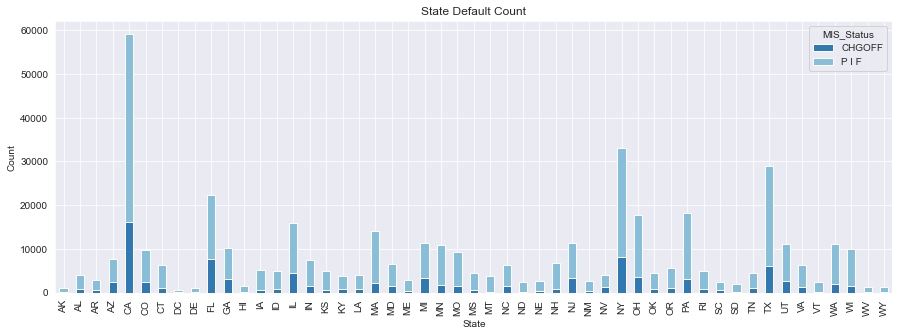

In [99]:
sns.set_style('darkgrid')
sns.set_palette('RdBu_r')
df_state_default_rate[['CHGOFF', 'P I F']].plot(kind='bar', stacked=True, figsize=(15, 5))
plt.ylabel('Count')
plt.title('State Default Count')
plt.show()

#### Approval to Disbursement Day for State

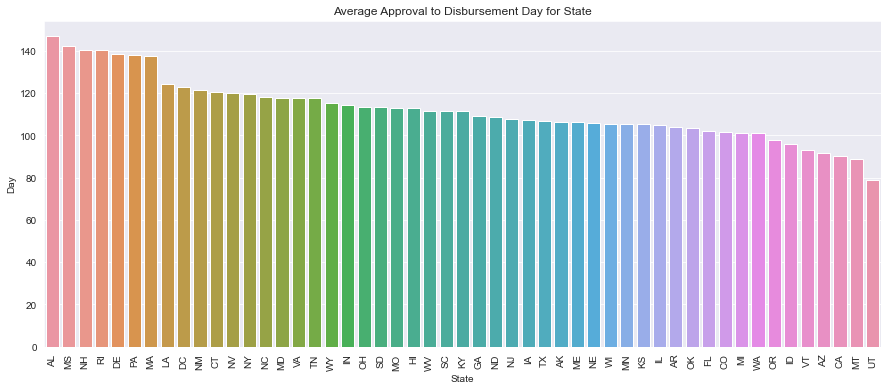

In [100]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=df.groupby(['State']).mean().sort_values('DaysToDisbursement', ascending=False).index,
    y=df.groupby(['State']).mean().sort_values('DaysToDisbursement', ascending=False).DaysToDisbursement
)
plt.xticks(rotation=90)
plt.ylabel('Day')

plt.title('Average Approval to Disbursement Day for State')

plt.show()

Berdasarkan chart untuk tiap State diatas, kita mendapatkan beberapa informasi diantaranya:
- Pada choropleth USA, dapat kita lihat State dengan rasio default tertinggi yaitu FL(0.33953), AZ(0.32498), NV(0.30908), MI(0.30274), dan GA(0.30257).
- Untuk rasio default terendah ada pada State AK(0.08180), ND(0.06009), SD(0.05531), MT(0.04885), dan WY(0.04853).
- Terdapat simpangan yang cukup besar pada rasio default ini sehingga mengindikasikan State merupakan salah satu faktor penting yang menentukan _default_ atau tidaknya suatu _loan_.
- CA, NY, dan TX merupakan State dengan jumlah _loan_ terbanyak.
- Terdapat variasi dalam rata-rata lama suatu _loan_ dicairkan,  MS merupakan State yang memiliki rentang waktu terlama, smentara UT memiliki rentang waktu paling singkat dalam rata-rata _disbursement day_.

#### Default Rate per Industry

In [101]:
df_default_per_ind = df.groupby(['NAICS', 'MIS_Status'])['NAICS'].count().unstack('MIS_Status')
df_default_per_ind['default_rate'] = df_default_per_ind['CHGOFF']/(df_default_per_ind['CHGOFF'] + df_default_per_ind['P I F'])
df_default_per_ind.sort_values('default_rate', ascending=False)

MIS_Status,CHGOFF,P I F,default_rate
NAICS,,,
Finance/Insurance,2093,3985,0.34436
RE/Rental/Lease,3097,6095,0.33692
Trans/Ware,4430,10025,0.30647
Educational,1072,2752,0.28033
Accom/Food_serv,8383,23948,0.25929
Information,1830,5230,0.25921
Admin_sup/Waste_Mgmt_Rem,5429,15792,0.25583
Construction,12052,35088,0.25566
Retail_trade,19055,59644,0.24213


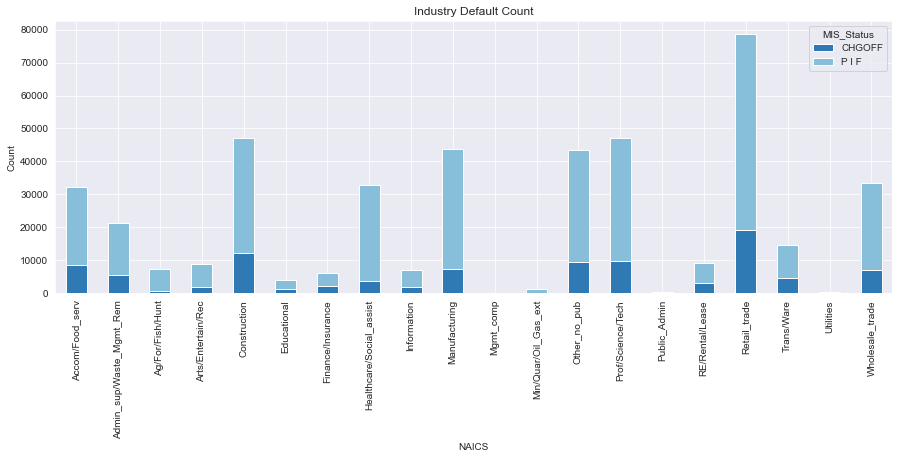

In [102]:
df_default_per_ind[['CHGOFF', 'P I F']].plot(kind='bar', stacked=True, figsize=(15, 5))
plt.ylabel('Count')
plt.title('Industry Default Count')
plt.show()

#### Disbursement per Industry

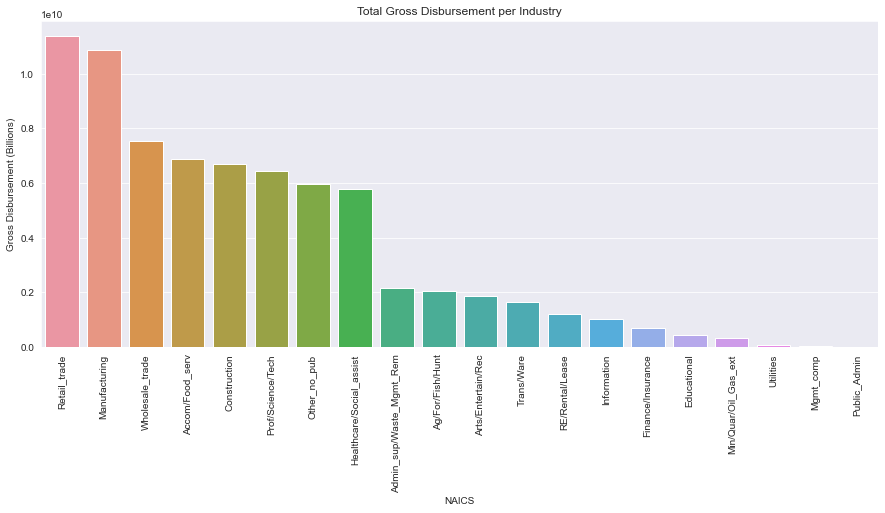

In [103]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=df.groupby(['NAICS']).sum().sort_values('DisbursementGross', ascending=False).index,
    y=df.groupby(['NAICS']).sum().sort_values('DisbursementGross', ascending=False).DisbursementGross
)
plt.xticks(rotation=90)
plt.ylabel('Gross Disbursement (Billions)')

plt.title('Total Gross Disbursement per Industry')

plt.show()

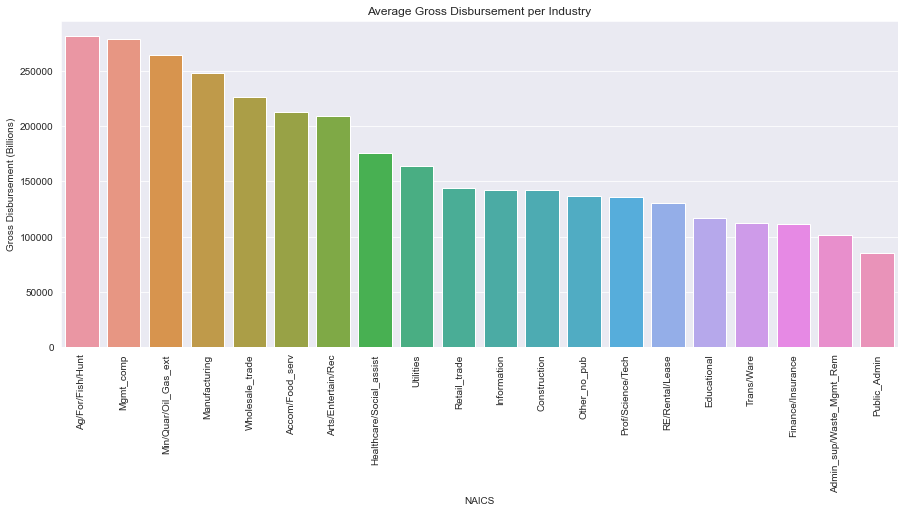

In [104]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=df.groupby(['NAICS']).mean().sort_values('DisbursementGross', ascending=False).index,
    y=df.groupby(['NAICS']).mean().sort_values('DisbursementGross', ascending=False).DisbursementGross
)
plt.xticks(rotation=90)
plt.ylabel('Gross Disbursement (Billions)')

plt.title('Average Gross Disbursement per Industry')

plt.show()

#### Approval to Disbursement Day for Each Industry

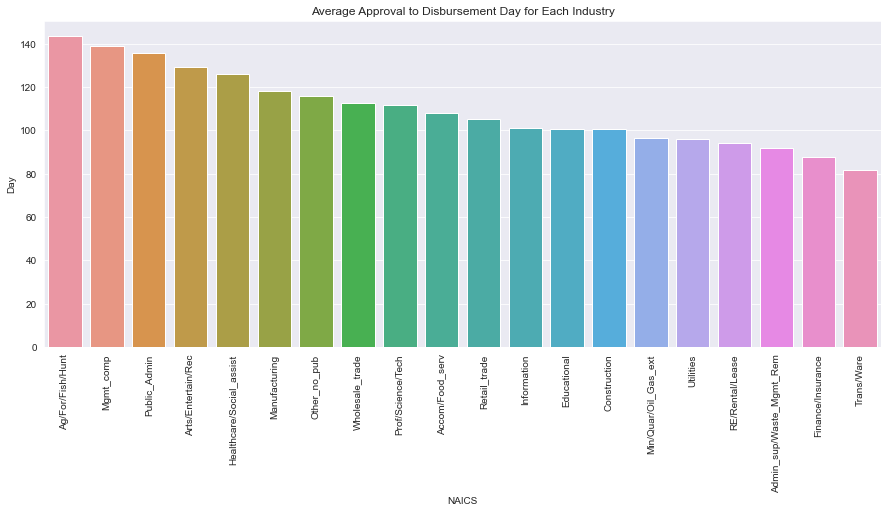

In [105]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=df.groupby(['NAICS']).mean().sort_values('DaysToDisbursement', ascending=False).index,
    y=df.groupby(['NAICS']).mean().sort_values('DaysToDisbursement', ascending=False).DaysToDisbursement
)
plt.xticks(rotation=90)
plt.ylabel('Day')

plt.title('Average Approval to Disbursement Day for Each Industry')

plt.show()

Untuk kategori 

#### Default Status by Binary Column

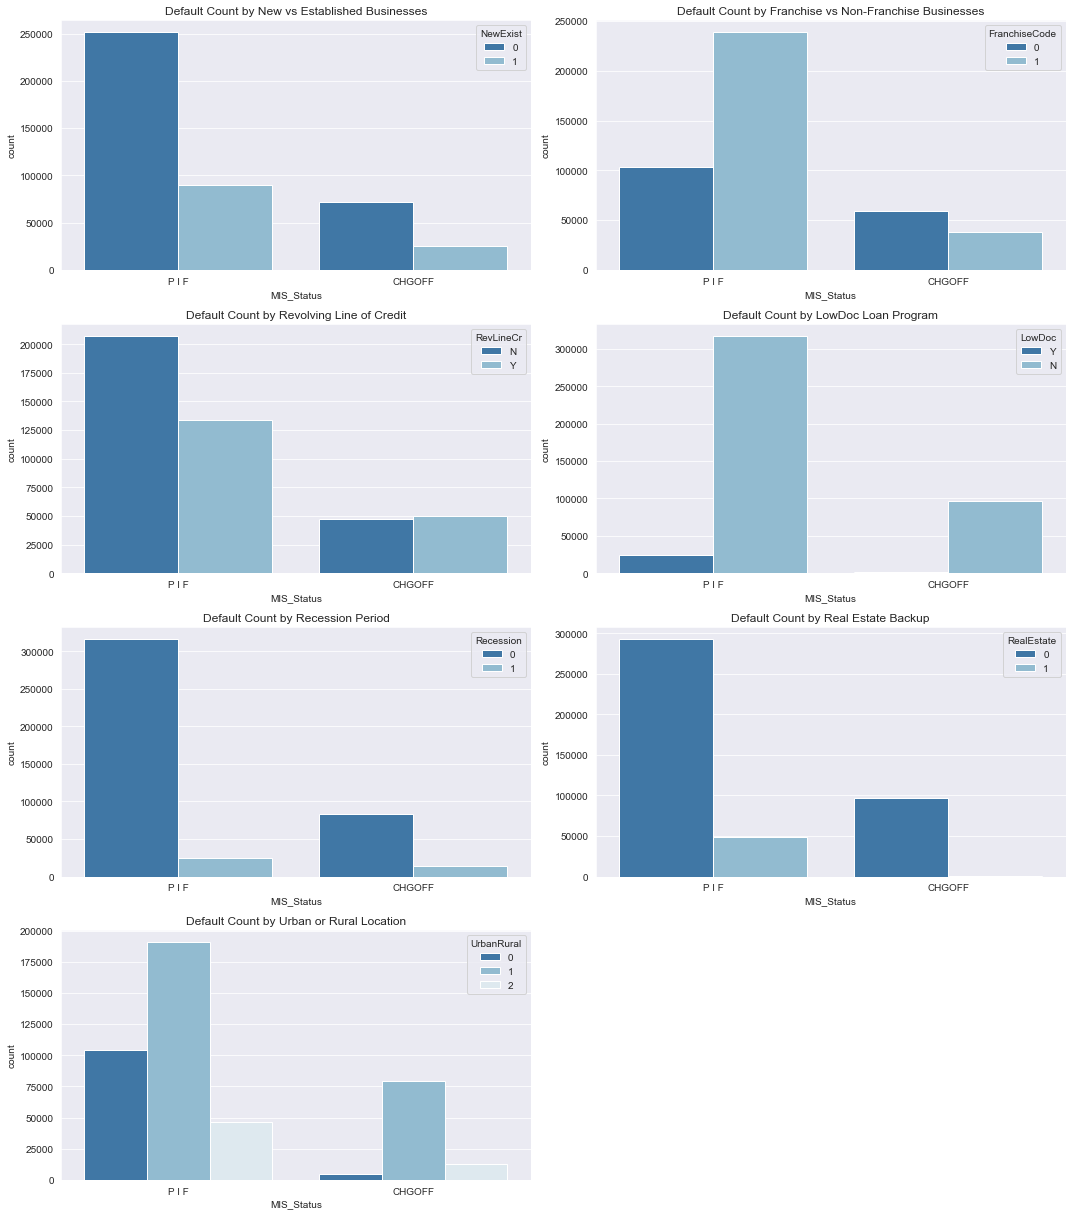

In [106]:
plt.figure(figsize=(15,17))

plt.subplot(4, 2, 1)
sns.countplot(x='MIS_Status', hue='NewExist', data=df)
plt.title('Default Count by New vs Established Businesses')

plt.subplot(4, 2, 2)
sns.countplot(x='MIS_Status', hue='FranchiseCode', data=df)
plt.title('Default Count by Franchise vs Non-Franchise Businesses')

plt.subplot(4, 2, 3)
sns.countplot(x='MIS_Status', hue='RevLineCr', data=df)
plt.title('Default Count by Revolving Line of Credit')

plt.subplot(4, 2, 4)
sns.countplot(x='MIS_Status', hue='LowDoc', data=df)
plt.title('Default Count by LowDoc Loan Program')

plt.subplot(4, 2, 5)
sns.countplot(x='MIS_Status', hue='Recession', data=df)
plt.title('Default Count by Recession Period')

plt.subplot(4, 2, 6)
sns.countplot(x='MIS_Status', hue='RealEstate', data=df)
plt.title('Default Count by Real Estate Backup')

plt.subplot(4, 2, 7)
sns.countplot(x='MIS_Status', hue='UrbanRural', data=df)
plt.title('Default Count by Urban or Rural Location')

plt.tight_layout()
plt.show()

In [107]:
df.groupby(['DisbursementDate', 'MIS_Status'])['DisbursementDate'].count().unstack('MIS_Status')

MIS_Status,CHGOFF,P I F
DisbursementDate,,
1984-07-03,NaN,1.0
1987-01-23,2.0,NaN
1987-01-26,1.0,NaN
1987-01-28,2.0,NaN
1987-01-29,1.0,NaN
...,...,...
2010-12-24,NaN,5.0
2010-12-27,2.0,2.0
2010-12-28,2.0,4.0


#### Defaulted Loans by DisbursementYear

In [108]:
default_disbursement_year = pd.DataFrame(
    {
        'DisbursementYear':df.DisbursementDate.dt.year, 
        'MIS_Status':df.MIS_Status
    }
).groupby(['DisbursementYear', 'MIS_Status'])['DisbursementYear'].count().unstack('MIS_Status')

In [109]:
default_disbursement_year.drop(1984, inplace=True)

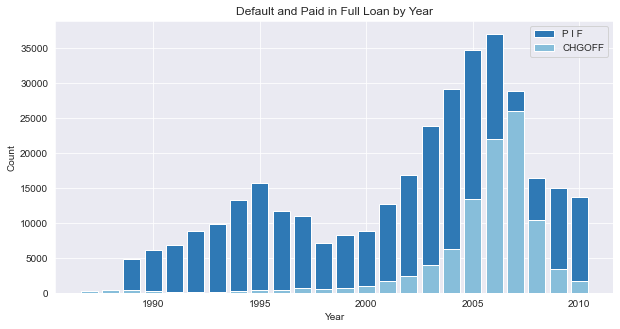

In [110]:
plt.figure(figsize=(10,5))
plt.bar(default_disbursement_year.index, default_disbursement_year['P I F'], label='P I F')
plt.bar(default_disbursement_year.index, default_disbursement_year['CHGOFF'], label='CHGOFF')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Default and Paid in Full Loan by Year')
plt.legend()
plt.show()

#### Ratio with Default Status

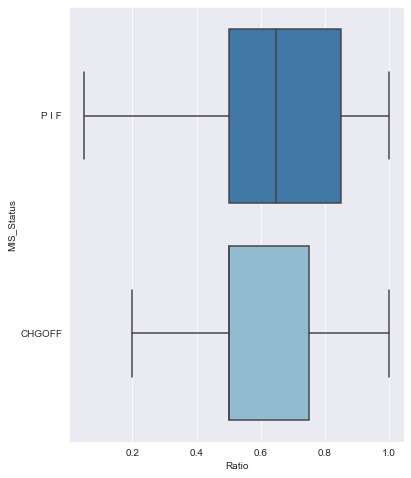

In [111]:
plt.figure(figsize=(6,8))
sns.boxplot('Ratio', 'MIS_Status', data=df)
plt.show()

#### Correlation Heat Map

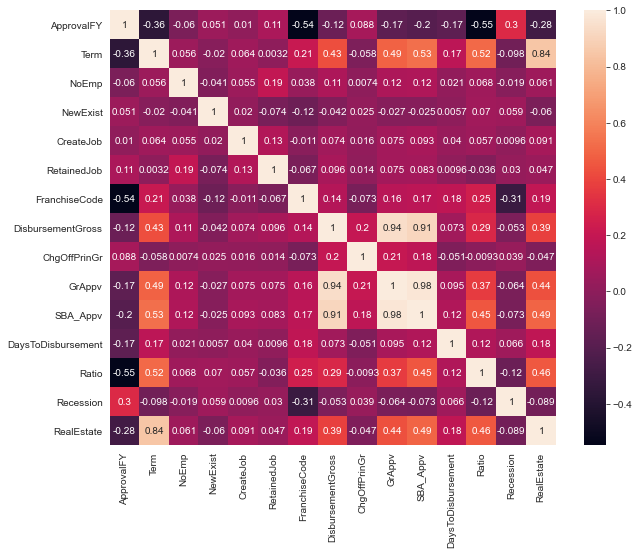

In [112]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [113]:
df

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate
0,IN,Retail_trade,1997-02-28,1997,84,4,1,0,0,1,0,N,Y,1999-02-28,60000.0,P I F,0.0,60000.0,48000.0,730,0.80,0,0
1,IN,Accom/Food_serv,1997-02-28,1997,60,2,1,0,0,1,0,N,Y,1997-05-31,40000.0,P I F,0.0,40000.0,32000.0,92,0.80,0,0
2,IN,Healthcare/Social_assist,1997-02-28,1997,180,7,0,0,0,1,0,N,N,1997-12-31,287000.0,P I F,0.0,287000.0,215250.0,306,0.75,0,0
3,CT,Manufacturing,1997-02-28,1997,120,19,0,0,0,1,0,N,N,1997-06-30,517000.0,P I F,0.0,517000.0,387750.0,122,0.75,0,0
4,FL,Other_no_pub,1997-02-28,1997,84,1,1,0,0,1,0,N,Y,1998-06-30,45000.0,P I F,0.0,45000.0,36000.0,487,0.80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438806,MD,Construction,1997-02-27,1997,60,5,0,0,0,1,0,Y,N,1997-03-31,25000.0,P I F,0.0,25000.0,12500.0,32,0.50,0,0
438807,CA,Manufacturing,1997-02-27,1997,240,8,0,4,0,1,0,N,N,1997-08-13,189000.0,P I F,0.0,189000.0,189000.0,167,1.00,0,1
438808,CA,Manufacturing,1997-02-27,1997,36,40,0,0,0,1,0,N,N,1997-03-31,200000.0,P I F,0.0,200000.0,150000.0,32,0.75,0,0
438809,OH,Retail_trade,1997-02-27,1997,60,6,0,0,0,1,0,Y,N,1997-10-31,85000.0,P I F,0.0,85000.0,42500.0,246,0.50,0,0


## Modelling

In [114]:
df_model = df.copy()
df_model

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate
0,IN,Retail_trade,1997-02-28,1997,84,4,1,0,0,1,0,N,Y,1999-02-28,60000.0,P I F,0.0,60000.0,48000.0,730,0.80,0,0
1,IN,Accom/Food_serv,1997-02-28,1997,60,2,1,0,0,1,0,N,Y,1997-05-31,40000.0,P I F,0.0,40000.0,32000.0,92,0.80,0,0
2,IN,Healthcare/Social_assist,1997-02-28,1997,180,7,0,0,0,1,0,N,N,1997-12-31,287000.0,P I F,0.0,287000.0,215250.0,306,0.75,0,0
3,CT,Manufacturing,1997-02-28,1997,120,19,0,0,0,1,0,N,N,1997-06-30,517000.0,P I F,0.0,517000.0,387750.0,122,0.75,0,0
4,FL,Other_no_pub,1997-02-28,1997,84,1,1,0,0,1,0,N,Y,1998-06-30,45000.0,P I F,0.0,45000.0,36000.0,487,0.80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438806,MD,Construction,1997-02-27,1997,60,5,0,0,0,1,0,Y,N,1997-03-31,25000.0,P I F,0.0,25000.0,12500.0,32,0.50,0,0
438807,CA,Manufacturing,1997-02-27,1997,240,8,0,4,0,1,0,N,N,1997-08-13,189000.0,P I F,0.0,189000.0,189000.0,167,1.00,0,1
438808,CA,Manufacturing,1997-02-27,1997,36,40,0,0,0,1,0,N,N,1997-03-31,200000.0,P I F,0.0,200000.0,150000.0,32,0.75,0,0
438809,OH,Retail_trade,1997-02-27,1997,60,6,0,0,0,1,0,Y,N,1997-10-31,85000.0,P I F,0.0,85000.0,42500.0,246,0.50,0,0


In [115]:
df_model.drop(['ApprovalDate', 'DisbursementDate', 'ApprovalFY', 'ChgOffPrinGr'], axis=1, inplace=True)

In [116]:
df_model.RevLineCr = df_model.RevLineCr.apply(lambda x: 1 if x == 'Y' else 0)
df_model.LowDoc = df_model.LowDoc.apply(lambda x: 1 if x == 'Y' else 0)
df_model.MIS_Status = df_model.MIS_Status.apply(lambda x: 0 if x == 'P I F' else 1)

In [117]:
df_model

,State,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate
0,IN,Retail_trade,84,4,1,0,0,1,0,0,1,60000.0,0,60000.0,48000.0,730,0.80,0,0
1,IN,Accom/Food_serv,60,2,1,0,0,1,0,0,1,40000.0,0,40000.0,32000.0,92,0.80,0,0
2,IN,Healthcare/Social_assist,180,7,0,0,0,1,0,0,0,287000.0,0,287000.0,215250.0,306,0.75,0,0
3,CT,Manufacturing,120,19,0,0,0,1,0,0,0,517000.0,0,517000.0,387750.0,122,0.75,0,0
4,FL,Other_no_pub,84,1,1,0,0,1,0,0,1,45000.0,0,45000.0,36000.0,487,0.80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438806,MD,Construction,60,5,0,0,0,1,0,1,0,25000.0,0,25000.0,12500.0,32,0.50,0,0
438807,CA,Manufacturing,240,8,0,4,0,1,0,0,0,189000.0,0,189000.0,189000.0,167,1.00,0,1
438808,CA,Manufacturing,36,40,0,0,0,1,0,0,0,200000.0,0,200000.0,150000.0,32,0.75,0,0
438809,OH,Retail_trade,60,6,0,0,0,1,0,1,0,85000.0,0,85000.0,42500.0,246,0.50,0,0


In [147]:
df_model.to_csv('SBA_Model_1_Copy.csv', index=False)

In [148]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438811 entries, 0 to 438810
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               438811 non-null  object 
 1   NAICS               438811 non-null  object 
 2   Term                438811 non-null  int64  
 3   NoEmp               438811 non-null  int64  
 4   NewExist            438811 non-null  int64  
 5   CreateJob           438811 non-null  int64  
 6   RetainedJob         438811 non-null  int64  
 7   FranchiseCode       438811 non-null  int64  
 8   UrbanRural          438811 non-null  object 
 9   RevLineCr           438811 non-null  int64  
 10  LowDoc              438811 non-null  int64  
 11  DisbursementGross   438811 non-null  float64
 12  MIS_Status          438811 non-null  int64  
 13  GrAppv              438811 non-null  float64
 14  SBA_Appv            438811 non-null  float64
 15  DaysToDisbursement  438811 non-nul

In [119]:
# One hot encoding

X = pd.get_dummies(df_model.drop('MIS_Status', axis=1), drop_first=True)
y = df_model.MIS_Status

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# scale the data for logistic regression
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

## Baseline Model

### Logistic Regression

In [121]:
# Baseline Model for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

logit = LogisticRegression(random_state=101, n_jobs=-1)

logit.fit(X_train, y_train)
y_logit_pred = logit.predict(X_test)
y_logit_predproba = logit.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_logit_pred))
print(roc_auc_score(y_test, y_logit_predproba))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     68421
           1       0.73      0.54      0.62     19342

    accuracy                           0.85     87763
   macro avg       0.80      0.74      0.76     87763
weighted avg       0.84      0.85      0.84     87763

0.8818827979119603


In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

print('ROC AUC CV for Logistic Regression')
logit_cvscore = cross_val_score(logit, X_scaled, y, scoring='roc_auc', cv=5, n_jobs=-1)
logit_cvscore

ROC AUC CV for Logistic Regression


array([0.88392438, 0.72302111, 0.86602448, 0.71623216, 0.85013405])

In [123]:
# Feature Importances for Logit
logit_feat_importance = pd.DataFrame(logit.coef_[0], columns=['Score'])
logit_feat_importance['Column'] = X.columns
logit_feat_importance

,Score,Column
0,-2.95773,Term
1,-0.39688,NoEmp
2,-0.04154,NewExist
3,0.00940,CreateJob
4,-0.17972,RetainedJob
...,...,...
81,-0.08728,NAICS_Trans/Ware
82,-0.01771,NAICS_Utilities
83,-0.17680,NAICS_Wholesale_trade
84,0.84547,UrbanRural_1


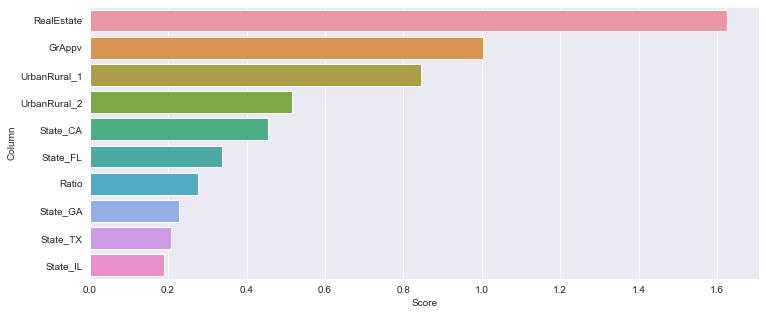

In [124]:
plt.figure(figsize=(12,5))
sns.barplot(data=logit_feat_importance.sort_values(by=['Score'],ascending=False).head(10),x='Score',y='Column')
plt.show()

### XGBoost

In [125]:
# Baseline Model for XGBClassifier
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

xgb = XGBClassifier(random_state=101, n_jobs=-1)

xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)
y_xgb_predproba = xgb.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_xgb_pred))
print(roc_auc_score(y_test, y_xgb_predproba))

C:\Users\Vicqy\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



              precision    recall  f1-score   support

           0       0.96      0.97      0.97     68421
           1       0.89      0.87      0.88     19342

    accuracy                           0.95     87763
   macro avg       0.93      0.92      0.92     87763
weighted avg       0.95      0.95      0.95     87763

0.980658791605448


In [126]:
print('ROC AUC for XGBoost')
xgb_cvscore = cross_val_score(xgb, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
xgb_cvscore

print('XGB ROC AUC Score Std')
np.std(xgb_cvscore)

ROC AUC for XGBoost
XGB ROC AUC Score Std


0.054994011574864984

In [127]:
xgb_cvscore

array([0.97893404, 0.94009425, 0.9441638 , 0.825509  , 0.96896195])

In [128]:
# Feature Importances for XGB
xgb_feat_importance = pd.DataFrame(xgb.feature_importances_, columns=['Score'])
xgb_feat_importance['Column'] = X.columns
xgb_feat_importance

,Score,Column
0,0.15088,Term
1,0.00450,NoEmp
2,0.00853,NewExist
3,0.00308,CreateJob
4,0.00791,RetainedJob
...,...,...
81,0.00277,NAICS_Trans/Ware
82,0.00000,NAICS_Utilities
83,0.00638,NAICS_Wholesale_trade
84,0.06572,UrbanRural_1


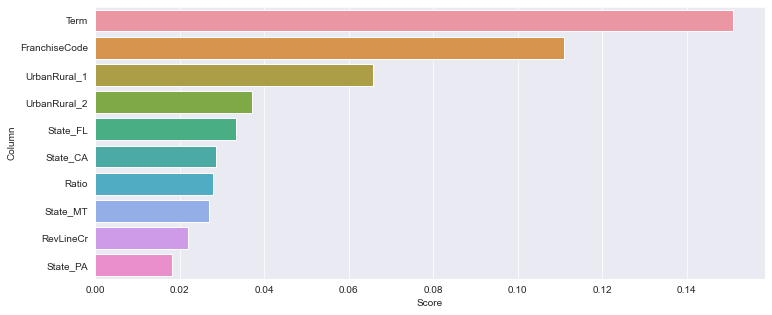

In [129]:
plt.figure(figsize=(12,5))
sns.barplot(data=xgb.sort_values(by=['Score'],ascending=False).head(10),x='Score',y='Column')
plt.show()

### Random Forest

In [130]:
# Baseline Model for Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=101, n_jobs=-1)
rfc.fit(X_train, y_train)

y_rfc_pred = rfc.predict(X_test)
y_rfc_predproba = rfc.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_rfc_pred))
print(roc_auc_score(y_test, y_rfc_predproba))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     68421
           1       0.89      0.81      0.85     19342

    accuracy                           0.93     87763
   macro avg       0.92      0.89      0.90     87763
weighted avg       0.93      0.93      0.93     87763

0.9692472821472972


In [131]:
rfc_cvscore = cross_val_score(rfc, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

print('ROC AUC for Random Forest Classifier :', rfc_cvscore)

print('Random Forest Classifier ROC AUC Score Std :', np.std(rfc_cvscore))

ROC AUC for Random Forest Classifier : [0.96627861 0.92334681 0.93040831 0.86335689 0.93176942]
Random Forest Classifier ROC AUC Score Std : 0.03335338024740236


In [132]:
# Feature Importances for Random Forest Classifier
rfc_feat_importance = pd.DataFrame(rfc.feature_importances_, columns=['Score'])
rfc_feat_importance['Column'] = X.columns
rfc_feat_importance

,Score,Column
0,0.42609,Term
1,0.03400,NoEmp
2,0.00944,NewExist
3,0.01793,CreateJob
4,0.03540,RetainedJob
...,...,...
81,0.00285,NAICS_Trans/Ware
82,0.00012,NAICS_Utilities
83,0.00395,NAICS_Wholesale_trade
84,0.01822,UrbanRural_1


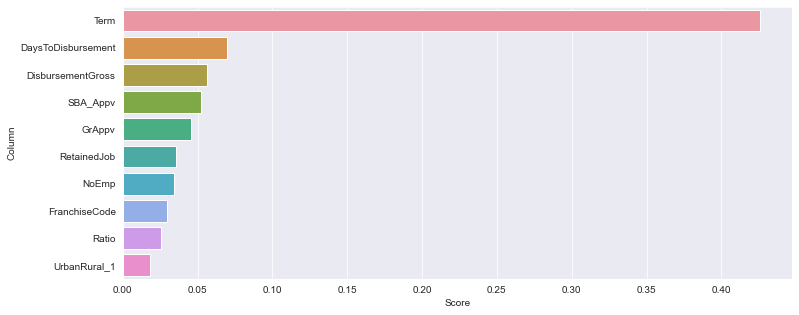

In [133]:
plt.figure(figsize=(12,5))
sns.barplot(data=rfc_feat_importance.sort_values(by=['Score'],ascending=False).head(10),x='Score',y='Column')
plt.show()

### Optimizing XGBoost Classifier

#### Optimizing 1

In [134]:
from sklearn.model_selection import RandomizedSearchCV

xgb_param_grid = {
    'learning_rate'   : [0.1],
    'n_estimators'    : [50, 70, 100],
    'max_depth'       : [3, 4, 5],
    'subsample'       : [0.5, 0.8],
    'colsample_bytree': [0.5, 0.8],
    'random_state'    : [101],
    'n_jobs'          : [-1]
}

xgb_tune_1 = XGBClassifier()

xgb_tune_1_grid = RandomizedSearchCV(
    estimator=xgb_tune_1,
    param_distributions=xgb_param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    cv = 5
)

xgb_tune_1_grid.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=10, n_

In [135]:
xgb_tune_1_grid.best_params_

{'subsample': 0.5,
 'random_state': 101,
 'n_jobs': -1,
 'n_estimators': 50,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [136]:
xgb_opt_1 = xgb_tune_1_grid.best_estimator_
xgb_opt_1.fit(X_train, y_train)

y_xgb_opt_1_pred = xgb_opt_1.predict(X_test)
y_xgb_opt_1_predproba = xgb_opt_1.predict_proba(X_test)[:,1]

print('Classification Report  :\n')
print(classification_report(y_test, y_xgb_opt_1_pred))

print('\nConfusion Matrix     :\n')
print(confusion_matrix(y_test, y_xgb_opt_1_pred))

print('\nROC AUC Score        :\n')
print(roc_auc_score(y_test, y_xgb_opt_1_predproba))

Classification Report  :

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     68421
           1       0.88      0.84      0.86     19342

    accuracy                           0.94     87763
   macro avg       0.92      0.90      0.91     87763
weighted avg       0.94      0.94      0.94     87763


Confusion Matrix     :

[[66149  2272]
 [ 3092 16250]]

ROC AUC Score        :

0.9723313003122743


In [137]:
xgb_opt_1_cvscore = cross_val_score(xgb_opt_1, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

In [138]:
print('XGB ROC AUC 5-Fold CV Score    : ', xgb_opt_1_cvscore)

print('\nXGB ROC AUC 5-Fold CV Std      : ', np.std(xgb_opt_1_cvscore))

XGB ROC AUC 5-Fold CV Score    :  [0.97473652 0.93411888 0.95733473 0.92048117 0.95216842]

XGB ROC AUC 5-Fold CV Std      :  0.018809873818175053


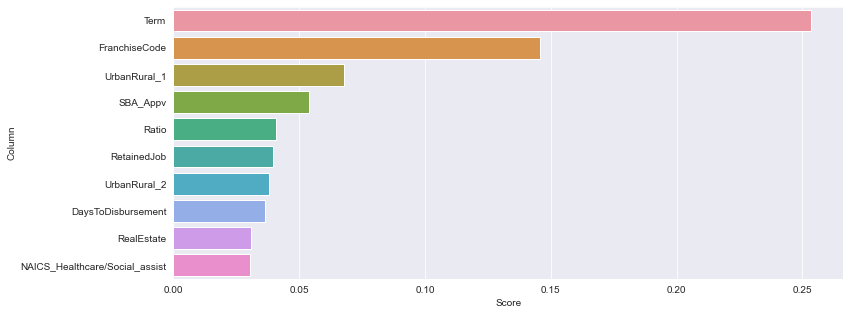

In [139]:
# Feature Importances for xgb_opt_1
xgb_opt_1_feat_importance = pd.DataFrame(xgb_opt_1.feature_importances_, columns=['Score'])
xgb_opt_1_feat_importance['Column'] = X.columns

plt.figure(figsize=(12,5))
sns.barplot(data=xgb_opt_1_feat_importance.sort_values(by=['Score'],ascending=False).head(10),x='Score',y='Column')
plt.show()

#### Optimizing 2

In [140]:
xgb_opt_2 = XGBClassifier(
    subsample= 0.5,
    random_state= 101,
    n_jobs= -1,
    n_estimators= 100,
    max_depth= 5,
    learning_rate= 0.1,
    colsample_bytree= 0.5
)

In [141]:
xgb_opt_2.fit(X_train, y_train)

y_xgb_opt_2_pred = xgb_opt_2.predict(X_test)
y_xgb_opt_2_predproba = xgb_opt_2.predict_proba(X_test)[:,1]

print('Classification Report  :\n')
print(classification_report(y_test, y_xgb_opt_2_pred))

print('\nConfusion Matrix     :\n')
print(confusion_matrix(y_test, y_xgb_opt_2_pred))

print('\nROC AUC Score        :\n')
print(roc_auc_score(y_test, y_xgb_opt_2_predproba))

Classification Report  :

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     68421
           1       0.89      0.85      0.87     19342

    accuracy                           0.94     87763
   macro avg       0.92      0.91      0.91     87763
weighted avg       0.94      0.94      0.94     87763


Confusion Matrix     :

[[66289  2132]
 [ 2922 16420]]

ROC AUC Score        :

0.9761347205721214


In [142]:
xgb_opt_2_cvscore = cross_val_score(xgb_opt_2, X, y, scoring='roc_auc', cv=5)

In [143]:
print('XGB ROC AUC 5-Fold CV Score    : ', xgb_opt_2_cvscore)

print('\nXGB ROC AUC 5-Fold CV Std      : ', np.std(xgb_opt_2_cvscore))

XGB ROC AUC 5-Fold CV Score    :  [0.9765648  0.94535663 0.95163101 0.91615089 0.96230099]

XGB ROC AUC 5-Fold CV Std      :  0.020130486822007035


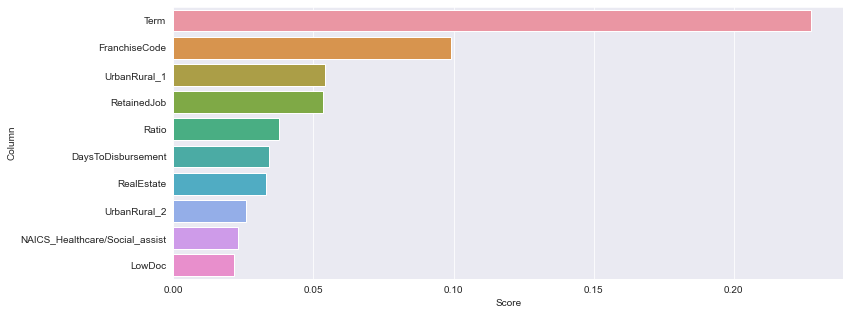

In [144]:
# Feature Importances for xgb_opt_2
xgb_opt_2_feat_importance = pd.DataFrame(xgb_opt_2.feature_importances_, columns=['Score'])
xgb_opt_2_feat_importance['Column'] = X.columns

plt.figure(figsize=(12,5))
sns.barplot(data=xgb_opt_2_feat_importance.sort_values(by=['Score'],ascending=False).head(10),x='Score',y='Column')
plt.show()

In [149]:
xgb_opt_4 = XGBClassifier(
    subsample= 0.8,
    random_state= 101,
    n_jobs= -1,
    n_estimators= 70,
    max_depth= 5,
    learning_rate= 0.1,
    colsample_bytree= 0.5,
    gamma=1
)

xgb_opt_4.fit(X_train, y_train)

y_xgb_opt_4_pred = xgb_opt_4.predict(X_test)
y_xgb_opt_4_predproba = xgb_opt_4.predict_proba(X_test)[:,1]

print('Classification Report  :\n')
print(classification_report(y_test, y_xgb_opt_4_pred))

print('\nConfusion Matrix     :\n')
print(confusion_matrix(y_test, y_xgb_opt_4_pred))

print('\nROC AUC Score        :\n')
print(roc_auc_score(y_test, y_xgb_opt_4_predproba))

Classification Report  :

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     68421
           1       0.88      0.84      0.86     19342

    accuracy                           0.94     87763
   macro avg       0.92      0.91      0.91     87763
weighted avg       0.94      0.94      0.94     87763


Confusion Matrix     :

[[66256  2165]
 [ 3030 16312]]

ROC AUC Score        :

0.9743681773513713


In [150]:
xgb_opt_4_cvscore = cross_val_score(xgb_opt_4, X, y, scoring='roc_auc', cv=5)

In [151]:
print('XGB ROC AUC 5-Fold CV Score    : ', xgb_opt_4_cvscore)

print('\nXGB ROC AUC 5-Fold CV Std      : ', np.std(xgb_opt_4_cvscore))

XGB ROC AUC 5-Fold CV Score    :  [0.9756843  0.93957363 0.95225502 0.91310114 0.95819303]

XGB ROC AUC 5-Fold CV Std      :  0.02086659133442273


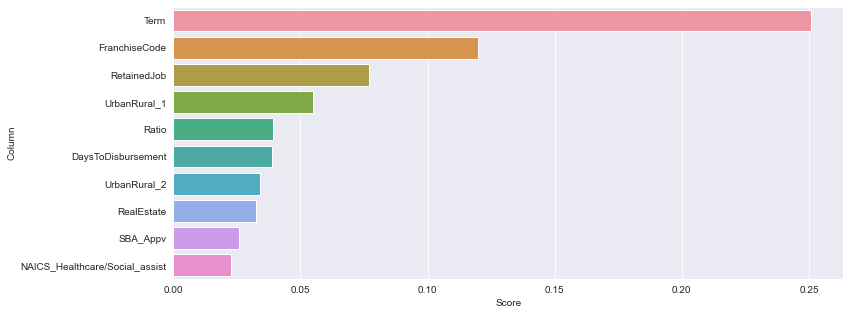

In [173]:
# Feature Importances for xgb_opt_4
xgb_opt_4_feat_importance = pd.DataFrame(xgb_opt_4.feature_importances_, columns=['Score'])
xgb_opt_4_feat_importance['Column'] = X.columns

plt.figure(figsize=(12,5))
sns.barplot(data=xgb_opt_4_feat_importance.sort_values(by=['Score'],ascending=False).head(10),x='Score',y='Column')
plt.show()

#### Try Oversampling

In [152]:
from imblearn.over_sampling import SMOTE

In [153]:
sm = SMOTE(random_state=101, n_jobs=-1)
X_sm, y_sm = sm.fit_sample(X_train, y_train)

#### Optimization Oversampling 1

In [188]:
# Baseline Model for xgboost

xgb_sm = XGBClassifier(random_state=101, n_jobs=-1)

xgb_sm.fit(X_sm, y_sm)
y_xgb_sm_pred = xgb_sm.predict(X_test)
y_xgb_sm_predproba = xgb_sm.predict_proba(X_test)[:,1]

print('Classification Report  :\n')
print(classification_report(y_test, y_xgb_sm_pred))

print('\nConfusion Matrix     :\n')
print(confusion_matrix(y_test, y_xgb_sm_pred))

print('\nROC AUC Score        :\n')
print(roc_auc_score(y_test, y_xgb_sm_predproba))

Classification Report  :

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     68421
           1       0.86      0.88      0.87     19342

    accuracy                           0.94     87763
   macro avg       0.91      0.92      0.92     87763
weighted avg       0.94      0.94      0.94     87763


Confusion Matrix     :

[[65668  2753]
 [ 2327 17015]]

ROC AUC Score        :

0.9769474184165574


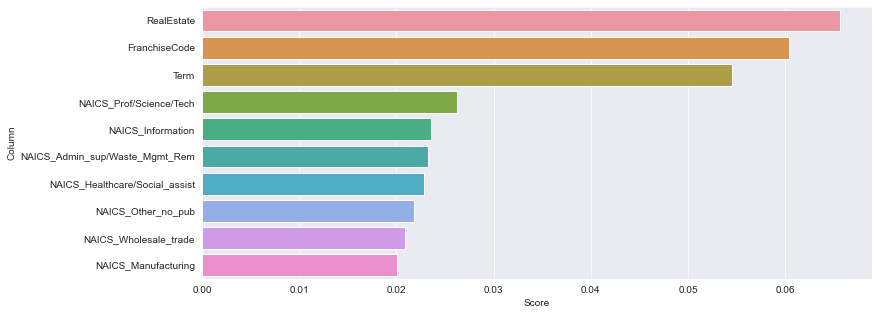

In [189]:
# Feature Importances for XGB
xgb_sm_feat_importance = pd.DataFrame(xgb_sm.feature_importances_, columns=['Score'])
xgb_sm_feat_importance['Column'] = X.columns
xgb_sm_feat_importance

plt.figure(figsize=(12,5))
sns.barplot(data=xgb_sm_feat_importance.sort_values(by=['Score'],ascending=False).head(10),x='Score',y='Column')
plt.show()

In [186]:
xgb_sm_cvscore = cross_val_score(xgb_sm, X, y, scoring='roc_auc', cv=5)

In [187]:
print('XGB ROC AUC 5-Fold CV Score    : ', xgb_sm_cvscore)
print('\nXGB ROC AUC 5-Fold CV Std      : ', np.std(xgb_sm_cvscore))

XGB ROC AUC 5-Fold CV Score    :  [0.97893404 0.94009425 0.9441638  0.825509   0.96896195]

XGB ROC AUC 5-Fold CV Std      :  0.054994011574864984
